https://www.kaggle.com/code/amrgghanem/flight-price-eda-ml-models

https://www.kaggle.com/code/mohsenzergani/flight-price-prediction-eda-regression-r2-99

https://www.kaggle.com/code/ahmedlashin/notebook05a1951226

In [2]:
!pip install sklearn_features

In [218]:
## Main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import randint

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.decomposition import PCA

## Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Models
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clean_Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.sample(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
230252,230252,Vistara,UK-954,Mumbai,Early_Morning,one,Night,Bangalore,Business,16.67,5,54608
89347,89347,Vistara,UK-657,Bangalore,Morning,one,Evening,Delhi,Economy,8.33,27,12214
91520,91520,Indigo,6E-6104,Bangalore,Morning,one,Evening,Delhi,Economy,7.17,38,3521
56763,56763,GO_FIRST,G8-7545,Mumbai,Afternoon,zero,Afternoon,Bangalore,Economy,1.67,24,2124
41663,41663,Vistara,UK-941,Delhi,Evening,one,Night,Chennai,Economy,6.33,41,4979
157665,157665,Indigo,6E-2093,Hyderabad,Morning,zero,Morning,Delhi,Economy,2.25,43,3191
116443,116443,Vistara,UK-858,Bangalore,Early_Morning,one,Evening,Chennai,Economy,13.25,13,9420
119352,119352,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,Economy,10.42,46,4672
198966,198966,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Kolkata,Economy,25.67,14,11069
286906,286906,Vistara,UK-874,Hyderabad,Morning,one,Morning,Chennai,Business,24.33,35,41314


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
df.duplicated().sum()

0

### HeatMap
* Typically, null values are represented by color (often yellow or white).
* Non-null values are represented by another color (often blue or black).

**Data Structure Visualization:**
1. **Each cell** in the heatmap corresponds to a cell in the DataFrame.
2. **Rows** represent **observations (samples)** in the dataset.
3. **Columns** represent **features (variables)** in the dataset.
4. **Dense areas of color** indicate **many missing values** in those rows or columns.


<Axes: >

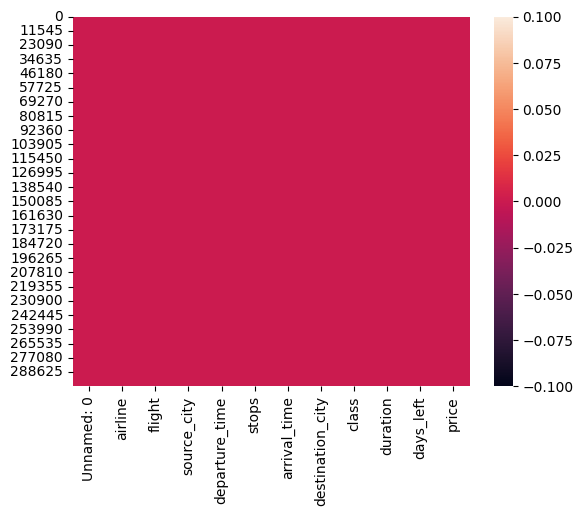

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.shape

(300153, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
df.columns[1]

'airline'

In [ ]:
# # df[1].numique()
# for i in df.columns:
#   print(i,df[i].nunique())

In [ ]:
df.nunique()

,0
Unnamed: 0,300153
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476


### Features Analysis

In [ ]:
df['price'].describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


### Exploratory Data Analysis (EDA)
some of EDA in pandas like:
* df.info()
* df.describe()
* df.head()

### Distribution Of Airline Companies

In [ ]:
com_counts=df['airline'].value_counts()
com_counts_table=pd.DataFrame(com_counts)
com_counts_table

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
com_counts

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


<Figure size 1000x600 with 0 Axes>

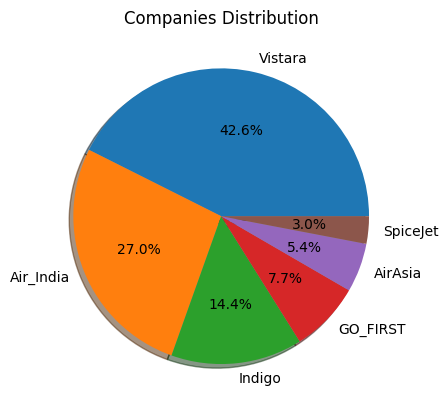

In [ ]:
plt.figure(figsize=(10,6))
fig,ax=plt.subplots()
ax.pie(com_counts_table.values.squeeze(),labels=com_counts_table.index,autopct='%1.1f%%',shadow=True)
plt.title('Companies Distribution')
plt.show()

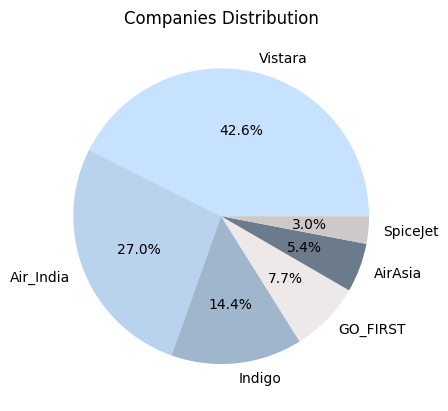

In [ ]:
plt.title('Companies Distribution')
airline_counts = df['airline'].value_counts()

plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', colors = ["#C6E2FF","#B9D3EE" ,"#9FB6CD","#EEE9E9","#6C7B8B","#CDC9C9"])

plt.show()

We see that the leading airline is Vistara



In [ ]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


<Axes: title={'center': 'Class'}, ylabel='count'>

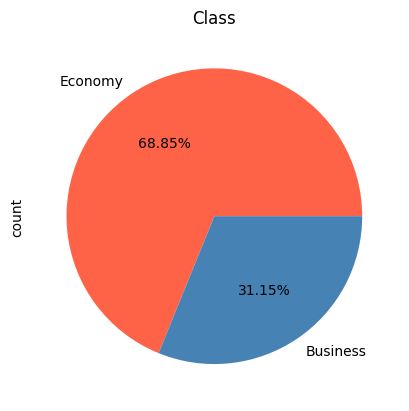

In [ ]:
plt.title('Class')

# round(..., 2): Rounds the percentages to two decimal places.
round(df['class'].value_counts()/df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", colors=["#FF6347", "#4682B4"])

### 1. Example of pivot_table

https://www.programiz.com/python-programming/pandas/pivot-table

In [ ]:
# # creating a dataframe
# df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
#       'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
#       'C': [27, 23, 21, 23, 24]})


# table = pd.pivot_table(df, index =['A', 'B'])

# table

### 2. pivot_table()

In [ ]:
# # create a dataframe
# data = {'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
#         'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
#         'Temperature': [32, 75, 30, 77]}
# df = pd.DataFrame(data)

# print("Original DataFrame\n", df)
# print()

# # pivot the dataframe
# pivot_df = df.pivot_table(index='Date', columns='City', values='Temperature')


# print("Reshaped DataFrame\n", pivot_df)

### 3. pivot_table() with Multiple Values

In [ ]:
# # create a dataframe
# data = {'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
#         'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
#         'Temperature': [32, 75, 30, 77],
#         'Humidity': [80, 10, 85, 5]}

# df = pd.DataFrame(data)

# print('Original DataFrame')
# print(df)
# print()

# # pivot the dataframe
# pivot_df = df.pivot_table(index='Date', columns='City')


# print('Reshaped DataFrame')
# print(pivot_df)

### 4. pivot_table() With Aggregate Functions

In [ ]:
# data = {'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03'],
#         'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles', 'New York', 'Los Angeles'],
#         'Temperature': [32, 75, 30, 77, 33, 78],
#         'Humidity': [80, 10, 85, 5, 81, 7]}

# df = pd.DataFrame(data)

# # calculate mean temperature for each city using pivot_table()
# mean_temperature = df.pivot_table(index='City', values='Temperature', aggfunc='mean')


# print(mean_temperature)

In [ ]:
flight_cities_num=df.pivot_table(index='source_city',columns='destination_city',aggfunc='count',values='price')

# Cell values showing the count of trips (or entries) between each source-destination pair

# When using 'count' as the aggregation function, the values parameter acts more as a placeholder. It tells pandas which column to count occurrences from, even though the actual values aren't being used.

In [ ]:
flight_cities_num

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,6410.0,13756.0,8928.0,10028.0,12939.0
Chennai,6493.0,NaN,9783.0,6103.0,6983.0,9338.0
Delhi,14012.0,10780.0,NaN,9328.0,11934.0,15289.0
Hyderabad,7854.0,6395.0,8506.0,NaN,7987.0,10064.0
Kolkata,9824.0,6653.0,10506.0,7897.0,NaN,11467.0
Mumbai,12885.0,10130.0,14809.0,10470.0,12602.0,NaN


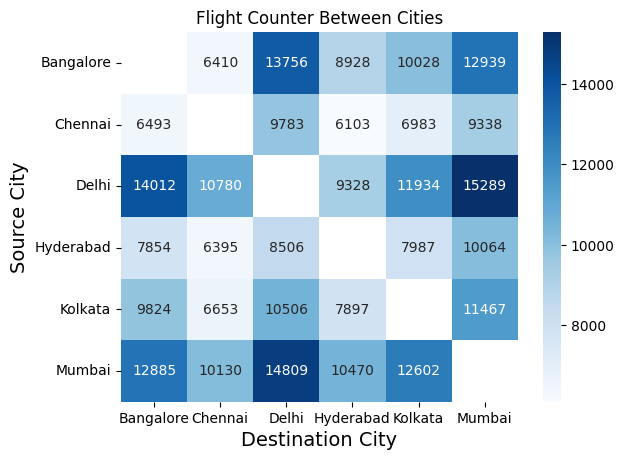

In [ ]:
sns.heatmap(flight_cities_num,annot=True,cmap='Blues',fmt='.0f')
plt.title('Flight Counter Between Cities')
plt.xlabel('Destination City',fontsize=14)
plt.ylabel('Source City',fontsize=14)
plt.show()

### What is the most expensive flight between two cities?

In [ ]:
grouped_data_city = df.groupby(['source_city','destination_city'])['price'].mean().sort_values(ascending=False)

grouped_data_city.head()

source_city  destination_city
Chennai      Bangalore           25081.850454
Kolkata      Chennai             23660.361040
Bangalore    Kolkata             23500.061229
             Chennai             23321.850078
Mumbai       Bangalore           23147.873807
Name: price, dtype: float64

<Axes: xlabel='source_city,destination_city'>

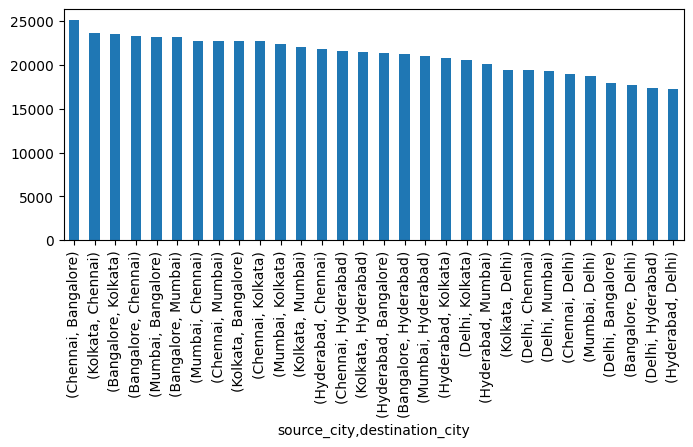

In [ ]:
fig = plt.figure(figsize = (8, 3))

grouped_data_city.plot(kind='bar')

👉 We note that the most expensive flight is from Chennai to Bangalore

### Average Prices for each Company


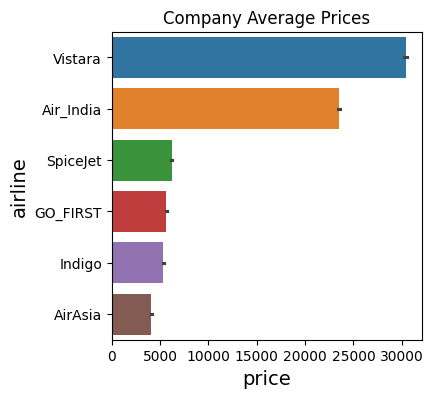

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='price',y='airline',data=df.sort_values('price',ascending=False),hue='airline')
plt.title('Company Average Prices')
plt.xlabel('price',fontsize=14)
plt.ylabel('airline',fontsize=14)
plt.show()

### Price Distribution of Calsses

<Axes: xlabel='price', ylabel='Count'>

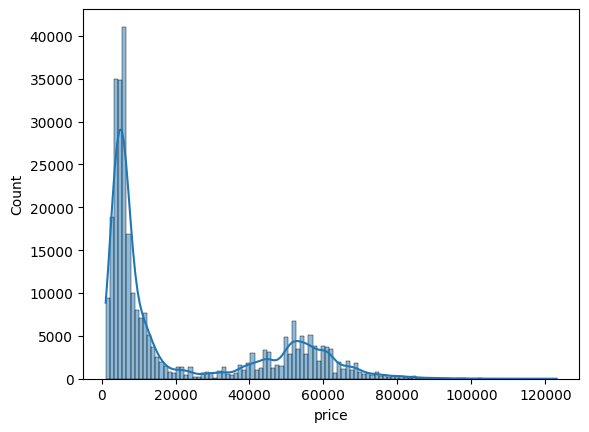

In [ ]:
sns.histplot(data=df['price'] ,kde=True)
# When kde=True, pandas uses kernel density estimation to generate a smooth curve representing the distribution of the data.

In [ ]:
# Dist_Class_price_1=df.groupby('class')['price'].mean()
# Dist_Class_price_1

<Figure size 400x400 with 0 Axes>

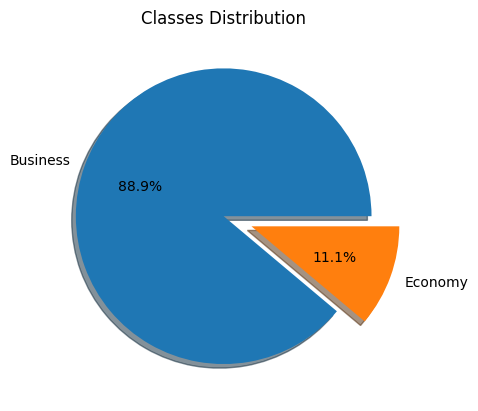

In [ ]:
plt.figure(figsize=(4,4))
Dist_Class_price=df.groupby('class').price.agg('mean')
class_price=pd.DataFrame(Dist_Class_price)
fig,ax=plt.subplots()
ax.pie(class_price.values.squeeze(),labels=class_price.index,autopct='%1.1f%%',shadow=True,explode=(0,0.2))
plt.title('Classes Distribution')
plt.show()

In [ ]:
Dist_Class_price

,price
class,
Business,52540.081124
Economy,6572.342383


The most class which books tickects is Economy ,But the most higher price range is a Business Class.

### Number of Stops per airlines

In [ ]:
# prompt: how can grouped by airlines and stops

airline_stops = df.groupby(['airline', 'stops'])['price'].mean()
print(airline_stops)


airline    stops      
AirAsia    one             4096.963741
           two_or_more     4432.956367
           zero            3747.960970
Air_India  one            24805.782885
           two_or_more    13771.177062
           zero           14403.191918
GO_FIRST   one             5972.272755
           two_or_more     7107.708642
           zero            3526.924915
Indigo     one             5733.028878
           two_or_more     7834.838753
           zero            4023.049037
SpiceJet   one             6789.364636
           zero            4556.430950
Vistara    one            32353.149720
           two_or_more    18850.767996
           zero           16416.273587
Name: price, dtype: float64


In [ ]:
# airline_stops_1 = df.groupby(['airline', 'stops'])['price'].mean()

# # Convert to DataFrame
# airline_stops_df = airline_stops_1.reset_index().rename(columns={'price': 'average_price'})

# print(airline_stops_df.head())

In [ ]:
df['stops'].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


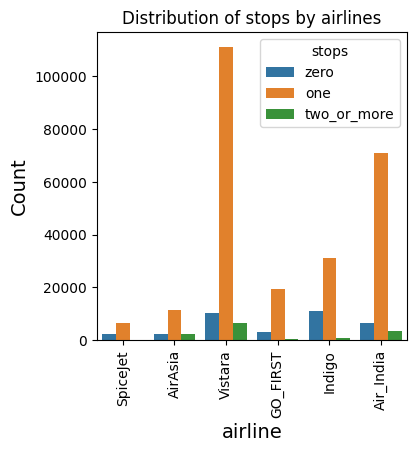

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='airline',data=df,hue='stops')
plt.title('Distribution of stops by airlines')
plt.xlabel('airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

<Axes: xlabel='stops', ylabel='price'>

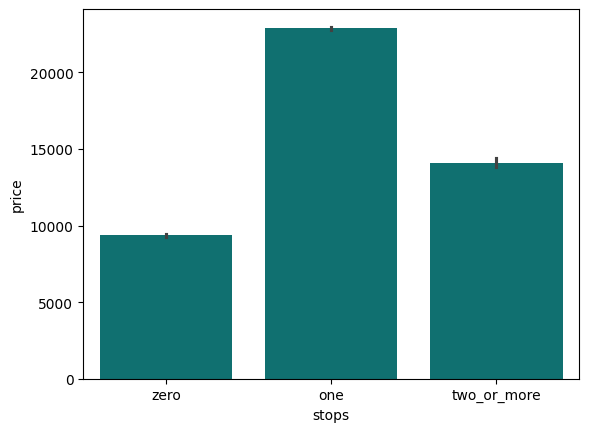

In [ ]:
sns.barplot(data=df, x="stops", y="price", color='#008080')

We see that the price is higher when the trip stops once

### Does the number of stops influences the price?

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

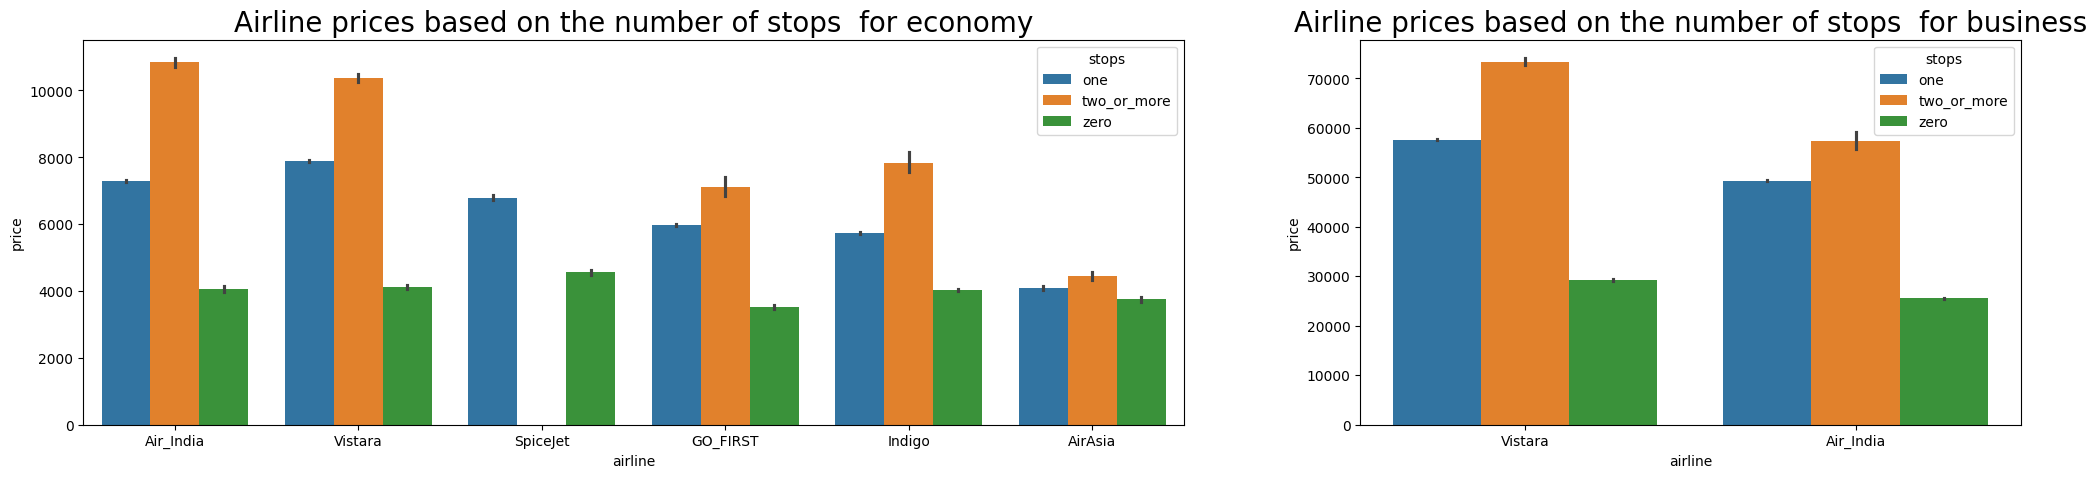

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])

axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)

sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])

axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

👉🏻It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant.

In [ ]:
fig = px.bar(df['source_city'].value_counts(), x=df['source_city'].value_counts().index, y=df['source_city'].value_counts().values)

fig.update_layout(xaxis_title="Source City", yaxis_title="Count")

fig.show()

We see that most flights take off from New Delhi as it is the capital



### Most flights Destination by Airlines

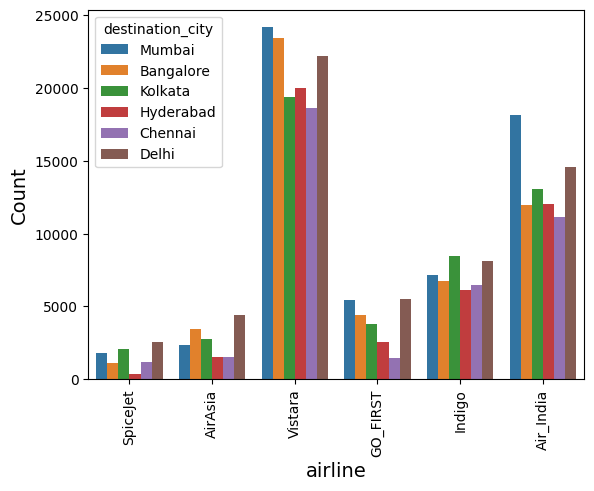

In [ ]:
sns.countplot(x='airline',hue='destination_city',data=df)
plt.xlabel('airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

### Total Average Prices of Departure Time

<Figure size 1000x600 with 0 Axes>

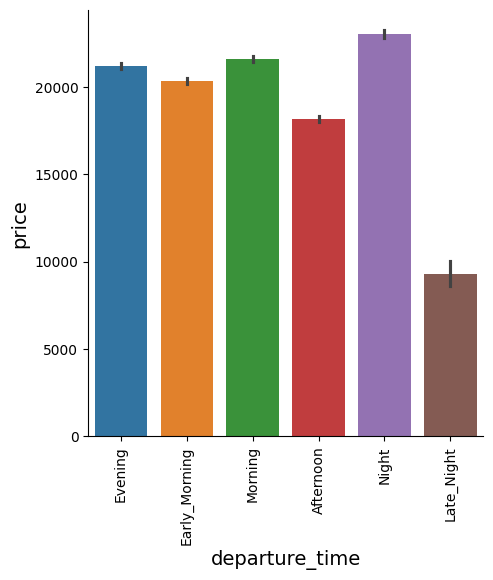

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x='departure_time',y='price',data=df,kind='bar',hue='departure_time')
plt.xlabel('departure_time',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('price',fontsize=14)
plt.show()

### Days Left Affection on prices

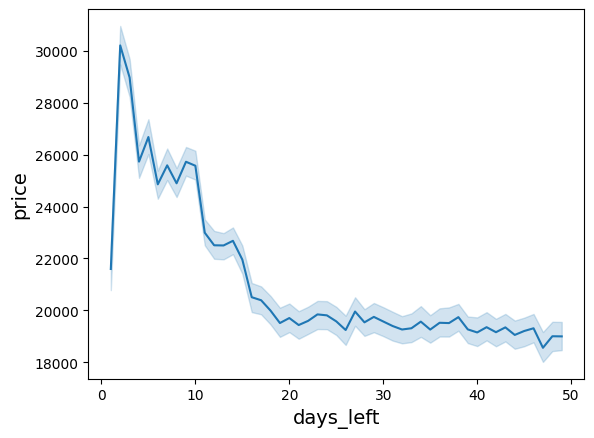

In [ ]:
sns.lineplot(x='days_left',y='price',data=df)
plt.xlabel('days_left',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

## Bivirate Visualization

### Average Duration Between Cities

In [ ]:
average_duration_cities=df.pivot_table(index='source_city',columns='destination_city',aggfunc='mean',values='duration')

In [ ]:
average_duration_cities

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,14.480207,9.779956,14.162433,13.099143,10.905072
Chennai,13.952594,NaN,11.149374,13.153985,14.515774,12.374656
Delhi,10.354125,12.433965,NaN,12.518350,12.735966,10.367774
Hyderabad,12.093317,13.293238,10.829817,NaN,13.535322,11.962923
Kolkata,13.792947,14.774182,11.604989,13.853108,NaN,12.991933
Mumbai,11.612023,12.665900,9.818057,13.263310,12.836848,NaN


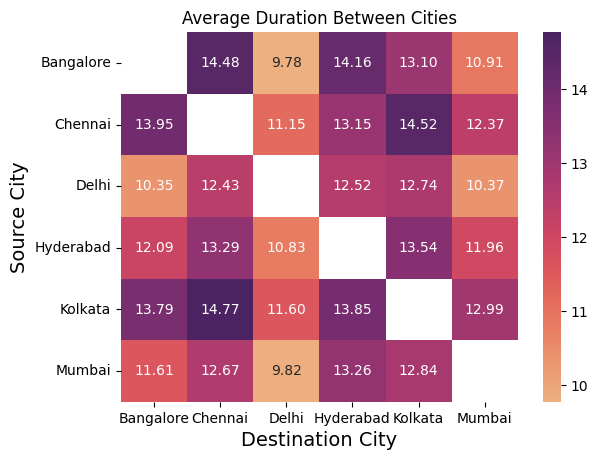

In [ ]:
sns.heatmap(average_duration_cities,annot=True,cmap='flare',fmt='.2f')
plt.title('Average Duration Between Cities')
plt.xlabel('Destination City',fontsize=14)
plt.ylabel('Source City',fontsize=14)
plt.show()

### prices of Airline per Class

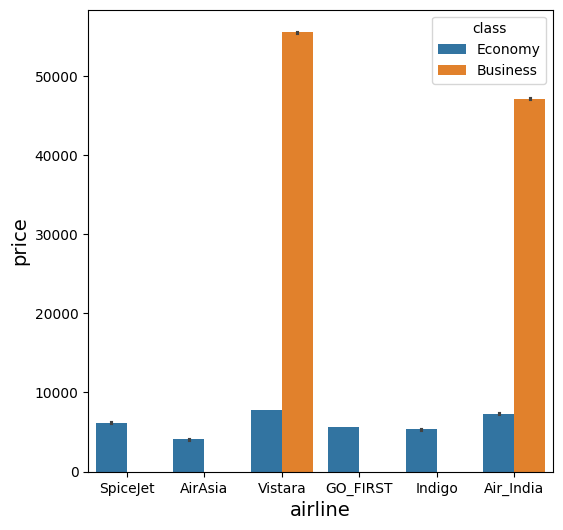

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='airline',y='price',data=df,hue='class')
plt.xlabel('airline',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

### Average Prices of Departure_Time by Airlines

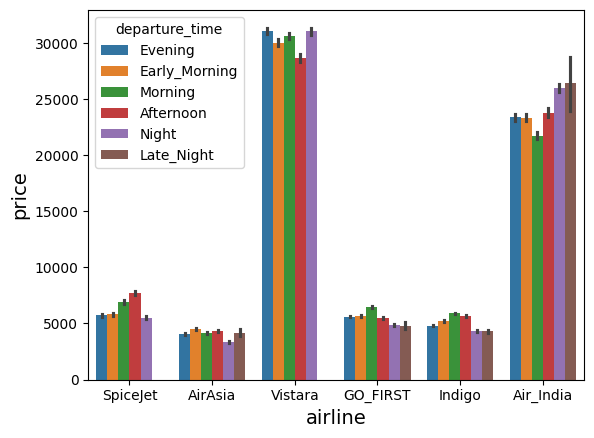

In [ ]:
sns.barplot(x='airline',y='price',data=df,hue='departure_time')
plt.xlabel('airline',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

### Average Destination City Prices by Airline

In [ ]:
AVG_des_air_price=df.pivot_table(index='destination_city',columns='airline',aggfunc='mean',values='price')

Text(0, 0.5, 'Destination city')

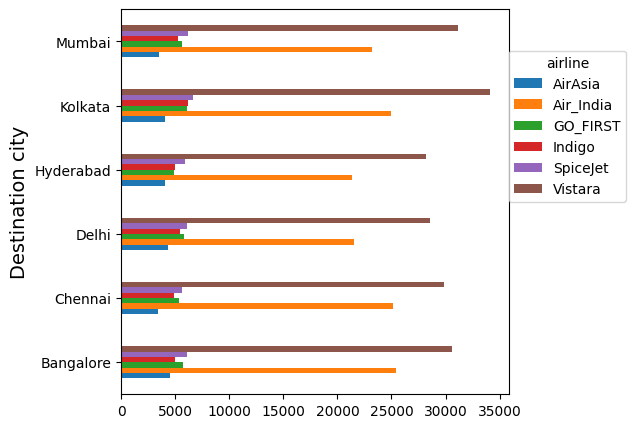

In [ ]:
plot=AVG_des_air_price.plot(kind='barh',figsize=(5,5))
sns.move_legend(plot,(1,0.5))
plt.ylabel('Destination city',fontsize=14)

### Average Prices VS Departure Time by Airline

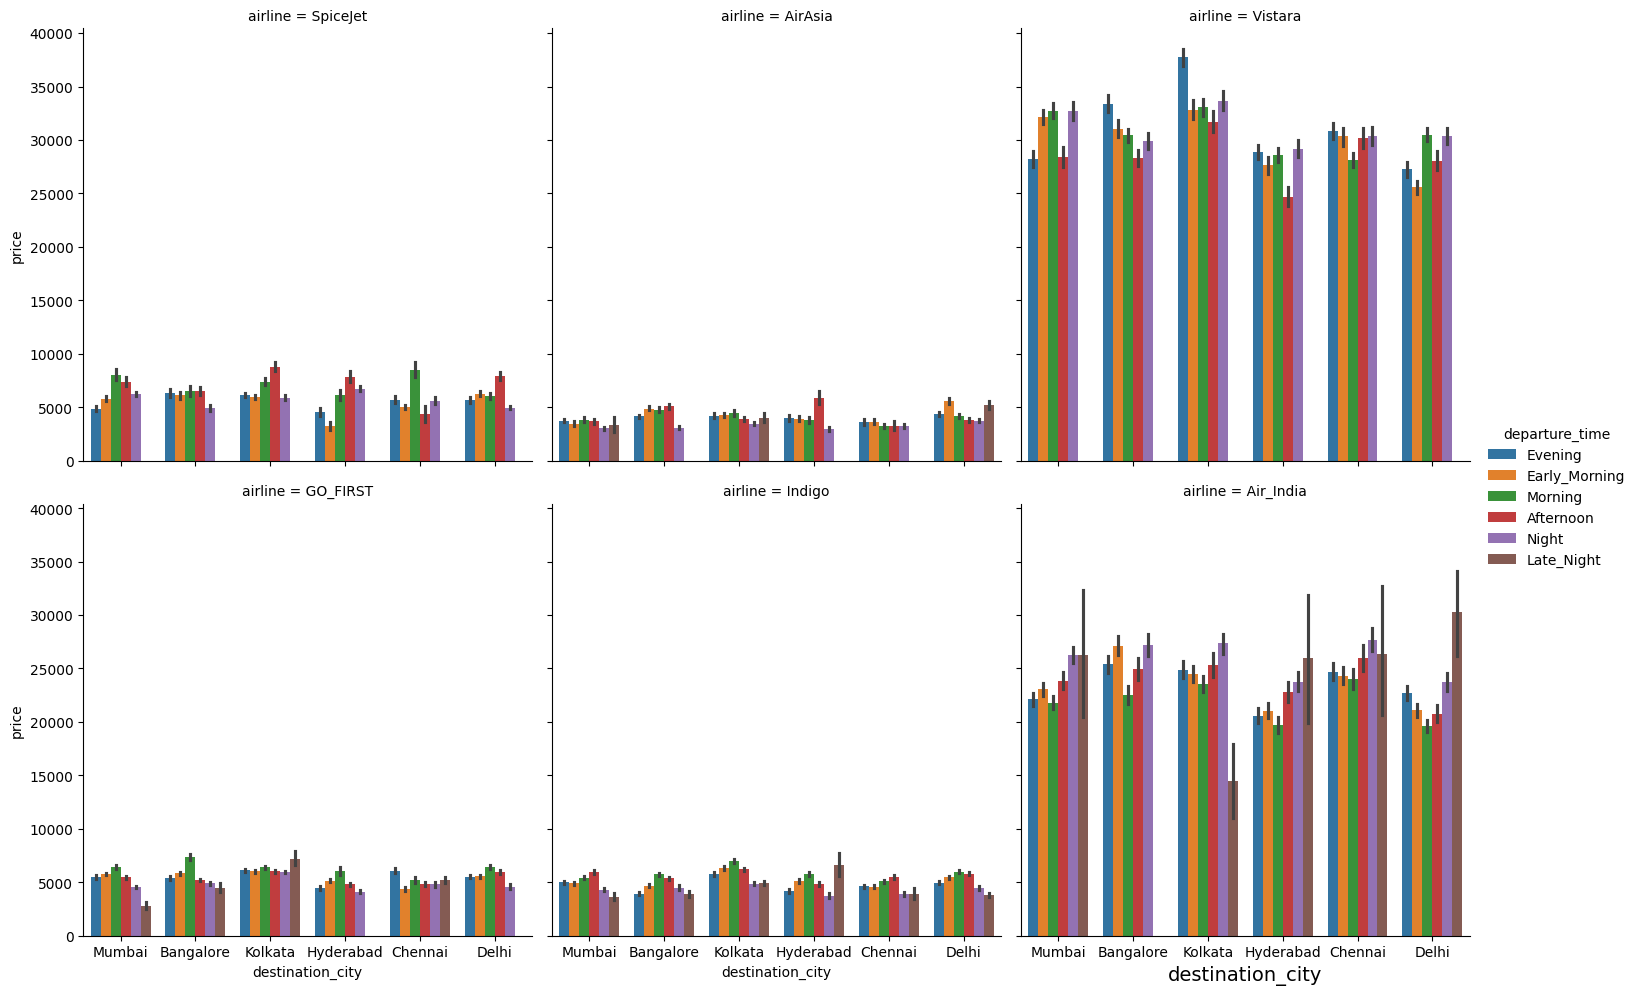

In [ ]:
sns.catplot(x='destination_city',y='price',data=df,hue='departure_time',kind='bar',col='airline',col_wrap=3)
plt.xlabel('destination_city',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

### Average Prices Between Cities by Airlines

In [ ]:
flight_cities_avg=df.pivot_table(index='source_city',columns='destination_city',aggfunc='mean',values='price')
df_cities_flight_price=pd.DataFrame(flight_cities_avg)
df_cities_flight_price

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,23321.850078,17723.313972,21226.121192,23500.061229,23128.618672
Chennai,25081.850454,NaN,18981.863948,21591.345404,22669.932407,22765.849647
Delhi,17880.216315,19369.881354,NaN,17347.288379,20566.409418,19355.829812
Hyderabad,21347.177998,21848.065989,17243.945685,NaN,20823.893201,20080.865759
Kolkata,22744.808428,23660.361040,19422.354559,21500.011397,NaN,22078.883579
Mumbai,23147.873807,22781.899112,18725.320008,21004.046705,22379.146723,NaN


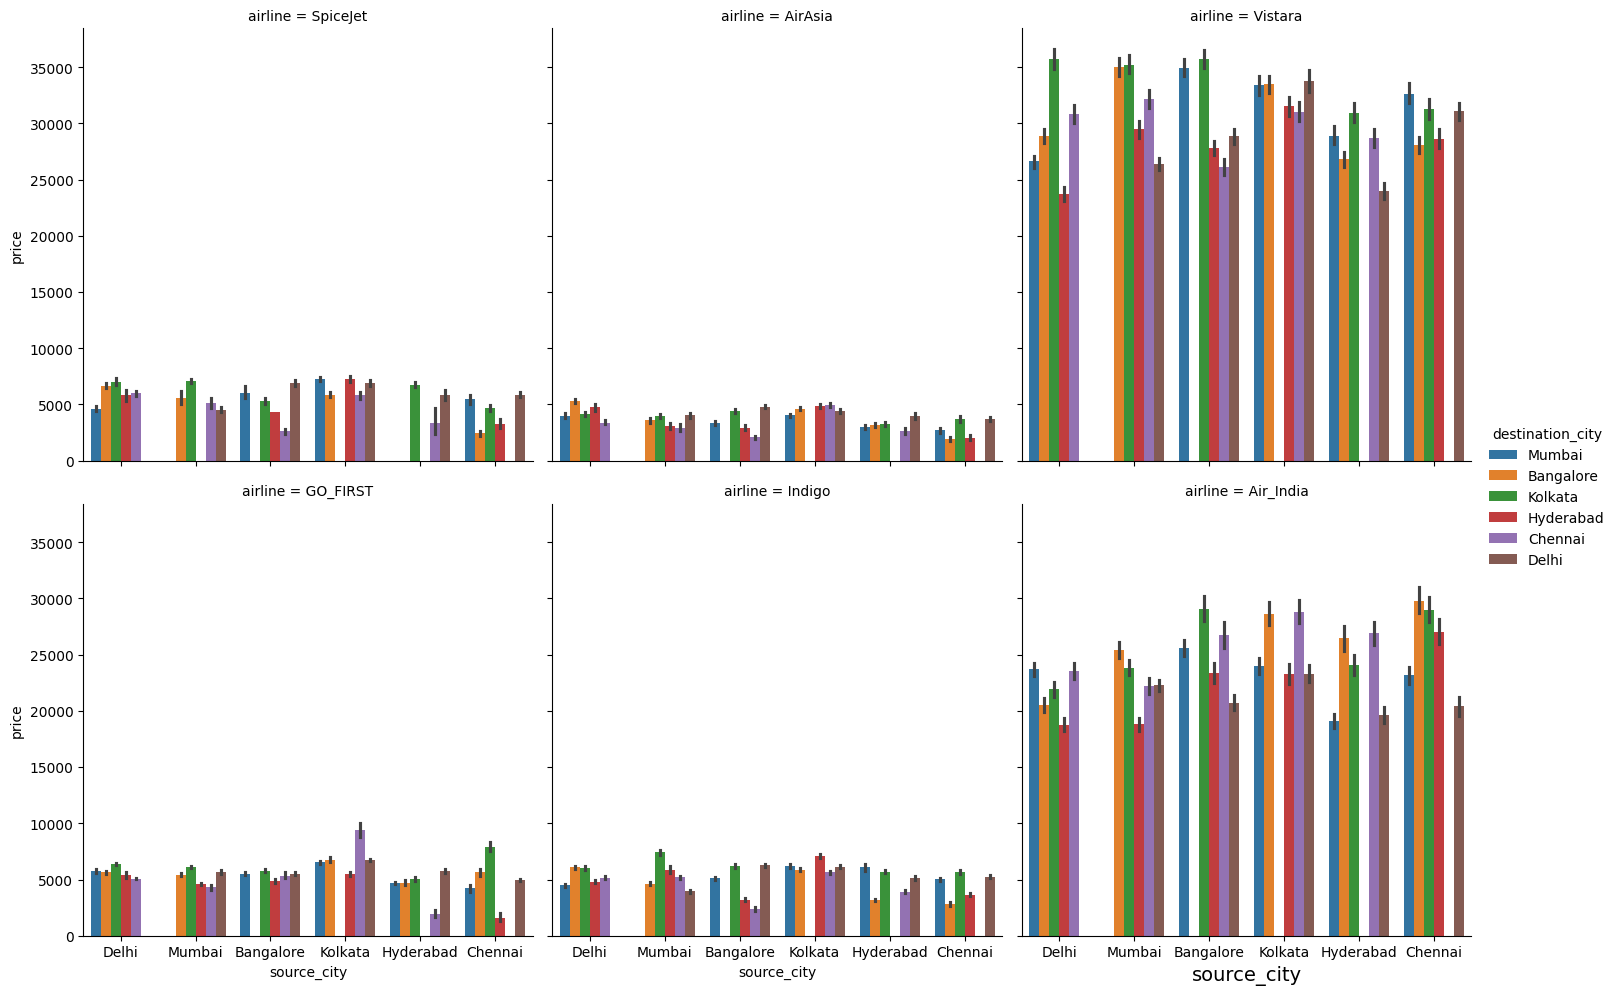

In [ ]:
sns.catplot(x=df['source_city'],y=df['price'],data=df_cities_flight_price,hue=df['destination_city'],kind='bar',col=df['airline'],col_wrap=3)
plt.xlabel('source_city',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
### Checking The Correlation

In [ ]:
price_corr=df.corr(numeric_only=True)['price'].sort_values(ascending=False)
price_corr

,price
price,1.000000
Unnamed: 0,0.761177
duration,0.204222
days_left,-0.091949


<Axes: >

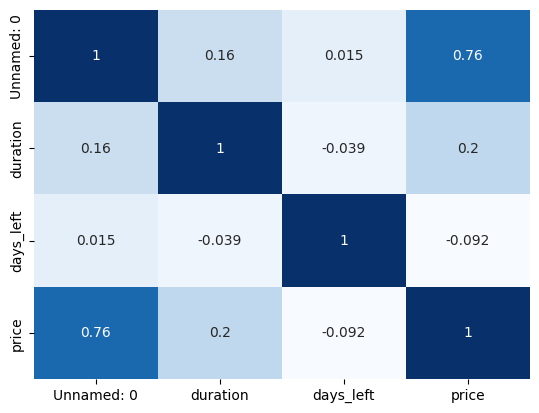

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False,cmap='Blues')

Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

<ipython-input-61-7f5f63f9122a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-61-7f5f63f9122a>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




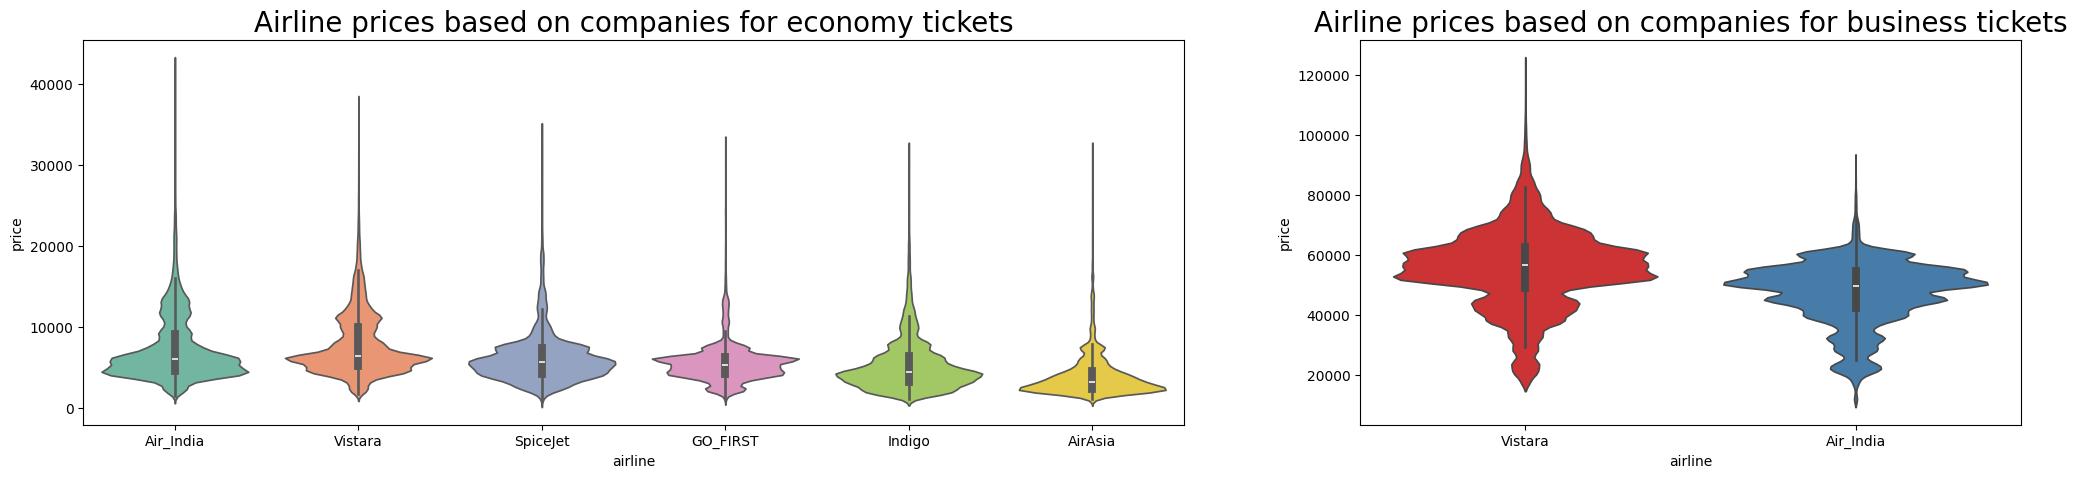

In [ ]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

sns.violinplot(y="price", x="airline", data=df.loc[df["class"] == 'Economy'].sort_values("price", ascending=False), palette="Set2", ax=axs[0])

axs[0].set_title("Airline prices based on companies for economy tickets", fontsize=20)

sns.violinplot(y="price", x="airline", data=df.loc[df["class"] == 'Business'].sort_values("price", ascending=False), palette="Set1", ax=axs[1])

axs[1].set_title("Airline prices based on companies for business tickets", fontsize=20)


plt.show()

### What is Most popular Airline ?

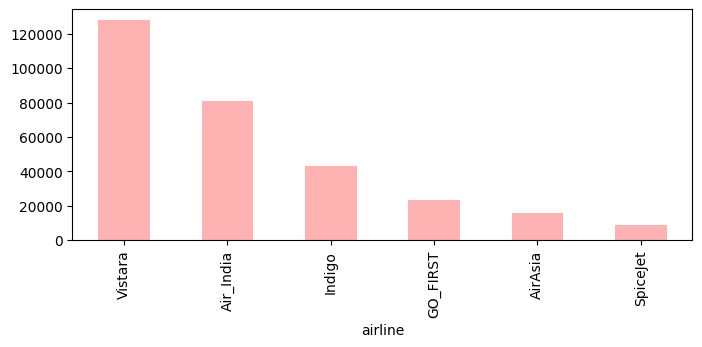

In [ ]:
plt.figure(figsize=(8,3))

df['airline'].value_counts().plot(kind='bar', color='red', alpha=0.3);

👉🏻 From the figure we notice that the most famous airlines in India are Vistara and Air_India


### How is the price affected when tickets are bought before departure ?

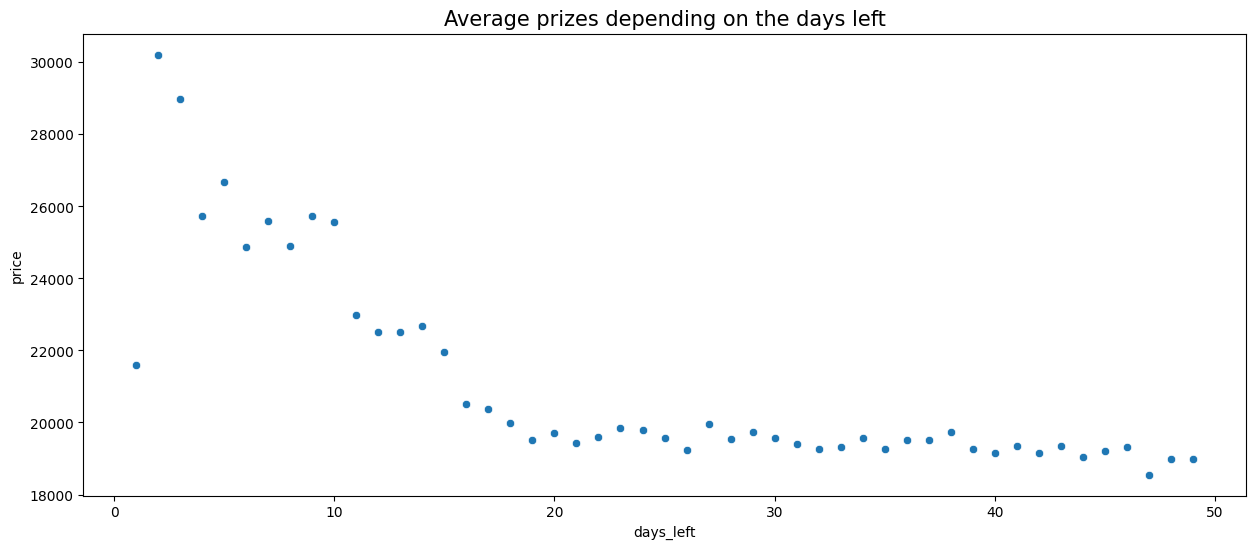

In [ ]:
grouped_df = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=grouped_df).set_title("Average prizes depending on the days left",fontsize=15)

👉🏻 The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

### Does ticket price change based on the departure time and arrival time?

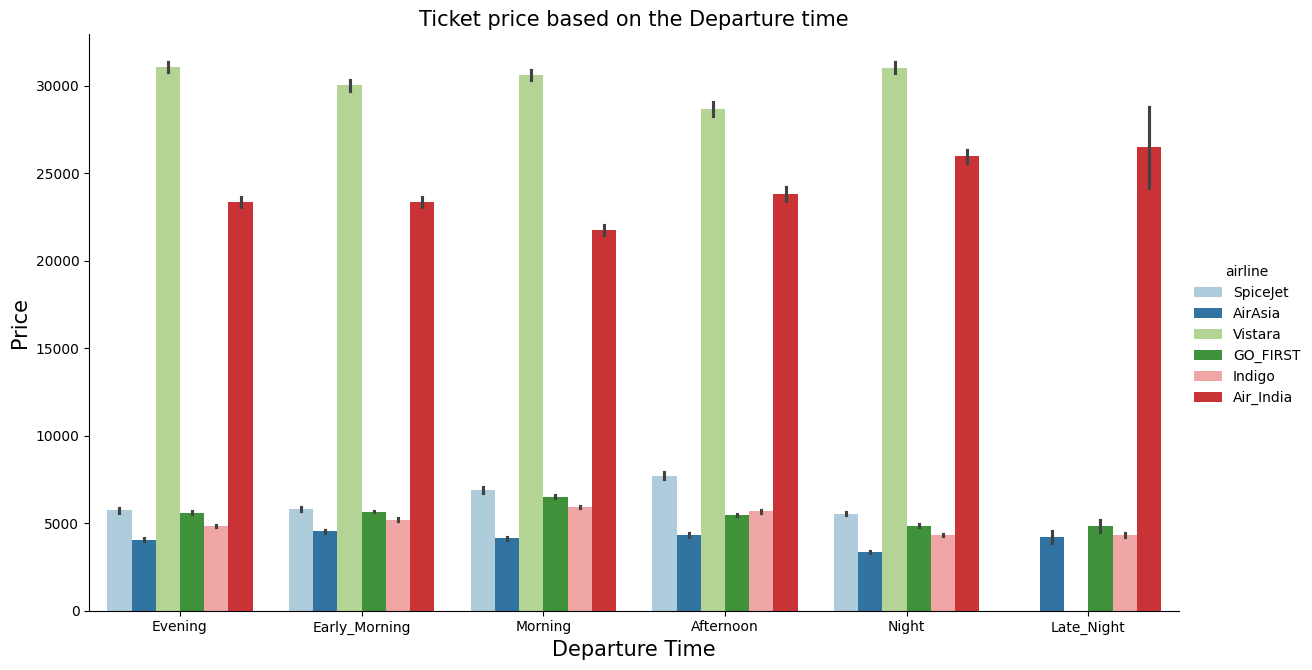

In [ ]:
sns.catplot(data=df, kind="bar", x="departure_time", y="price", hue="airline", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

plt.show()

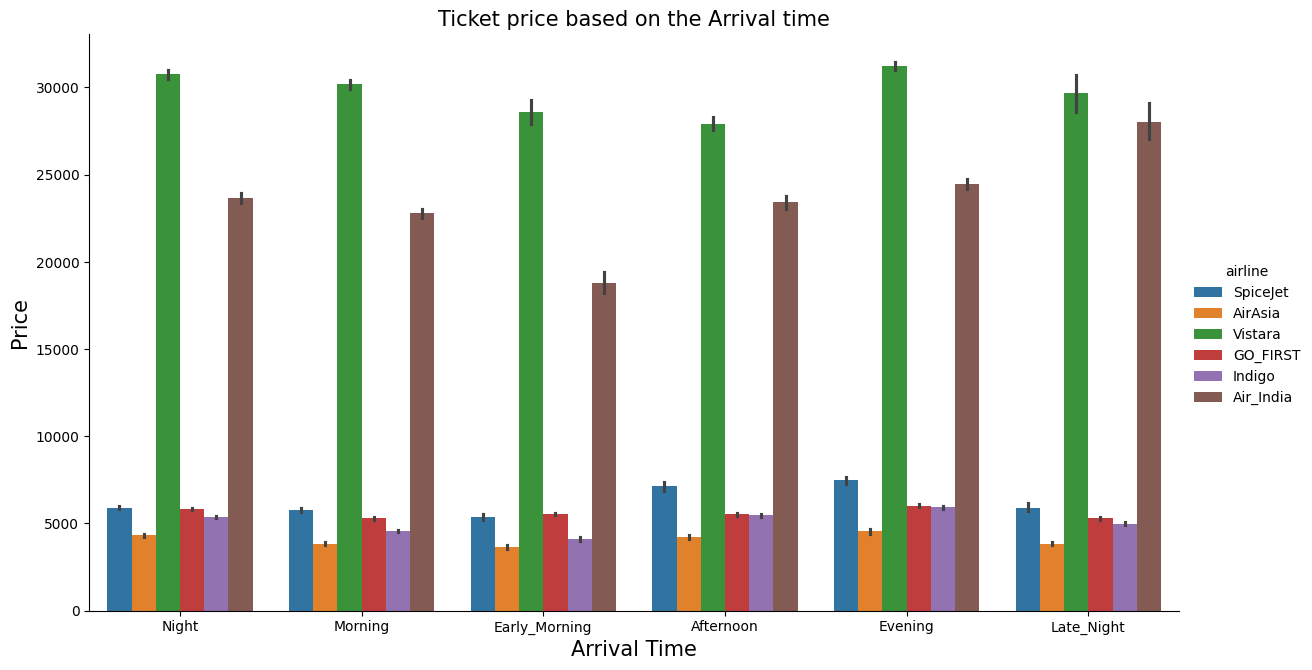

In [ ]:
sns.catplot(data=df, kind="bar", x="arrival_time", y="price", hue="airline", height=6.5, aspect=12/6.5)
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

plt.show()

Spliting Data

https://www.kaggle.com/code/amrgghanem/flight-price-eda-ml-models

Data Cleaning

https://www.kaggle.com/code/ahmedlashin/notebook05a1951226

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# # != 'O': Filters out columns whose dtype is not 'object' ('O')
# numerical_col = [col for col in df.columns if df[col].dtype != 'O']

# categorical_col = [col for col in df.columns if col not in numerical_col]



https://www.kaggle.com/code/mohsenzergani/flight-price-prediction-eda-regression-r2-99

In [ ]:
# copying data
df_copy = df.copy()

In [ ]:
# Coverting the labels into a numeric form using Label Encoder
le = LabelEncoder() # It's used to encode target labels with value between 0 and n_classes-1.
for col in df_copy.columns:
    if df_copy[col].dtype == "object":
      # encodes the labels and returns the encoded values.
      # The encoded values replace the original data in the DataFrame.
        df_copy[col] = le.fit_transform(df_copy[col])

In [ ]:
X = df_copy.drop(["price"],axis =1)
y=df_copy['price']

In [ ]:
# Split data into train and test sets
np.random.seed(42)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240122, 11), (60031, 11), (240122,), (60031,))

1. The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
2. The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
3. The fit_transform() method does both fits and transform.


In [ ]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
# Put models in a dictionary
models ={
        "ExtraTreesRegressor": ExtraTreesRegressor(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "KNeighborsRegressor":KNeighborsRegressor()}


# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'ExtraTreesRegressor': 0.9878244398276844,
 'DecisionTreeRegressor': 0.9768877365759219,
 'KNeighborsRegressor': 0.9720506362427166}

### Model Comparison

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,ExtraTreesRegressor,DecisionTreeRegressor,KNeighborsRegressor
accuracy,0.987824,0.976888,0.972051


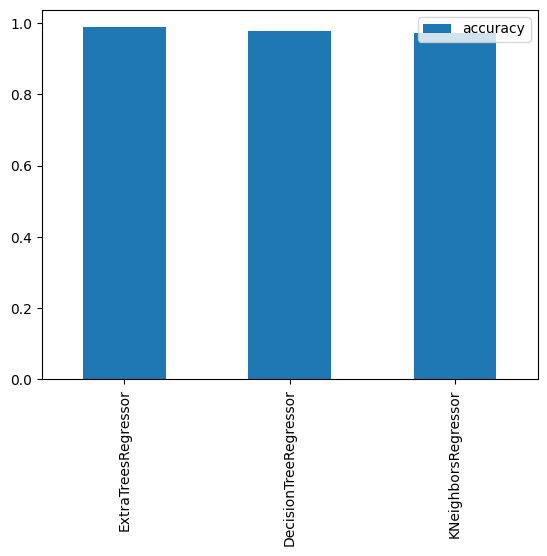

In [ ]:
model_compare.T.plot.bar();


### Now we should tune or Hyperparamters with 3 Algorithms:
1. KNeighborsRegressor()
2. RandomizedSearchCV()

# KNN Algorithm:
1. **KNN** can be used for both **classification and regression** predictive problems.
2. **However, it is more widely used in classification problems** in the industry.
3. **Classification** is a prediction task with a **Categorical target variable**
4. **Regression** is a prediction task in which the **target variable is Numeric**
5. It is also frequently used in missing value imputation.
6. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set
7. We can therefore classify unforeseen points based on the values of the closest existing points.
8. **By choosing K**, the user can select the number of nearby observations to use in the algorithm.
9. **KNeighborsClassifier:** This model is used for **Classification tasks**, where **the goal is to assign a label** to a new data point **based on the majority class among its k nearest neighbors.**
10. For example, if you have a dataset with categorical labels (like different emotions), the classifier will predict the class that appears most frequently among the neighbors.
11. **KNeighborsRegressor:** In contrast, this model is designed for regression tasks, where the objective is to **predict a continuous value.** The regressor calculates the average (mean) of the target values of the k nearest neighbors to make its prediction.
12. KNeighborsClassifier:
  * Suitable for problems where the output variable is categorical, such as image classification or sentiment analysis.
13. KNeighborsRegressor:
  * Appropriate for problems where the output variable is continuous, such as predicting house prices or stock prices.


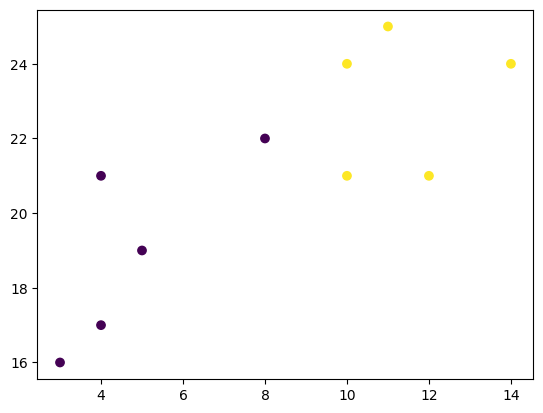

In [ ]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

Now we fit the KNN algorithm with K=1:

In [ ]:
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

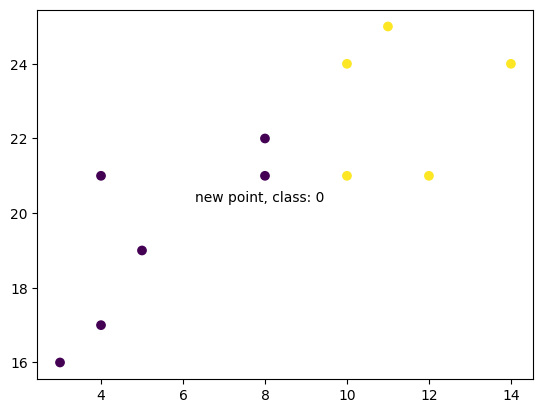

In [ ]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

### Hyperparameter tuning (by hand)

### Hyperparamter Tuning with KNeighborsRegressor()

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# create a list of differnt values for Knn
neighbors = range(1, 21)
# Setup KNN instance
knn = KNeighborsRegressor()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the neighbors
    knn.fit(X_train,y_train)

    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    # update the test Scores List
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
len(test_scores)

20

Maximum KNN score on the test data: 97.21%


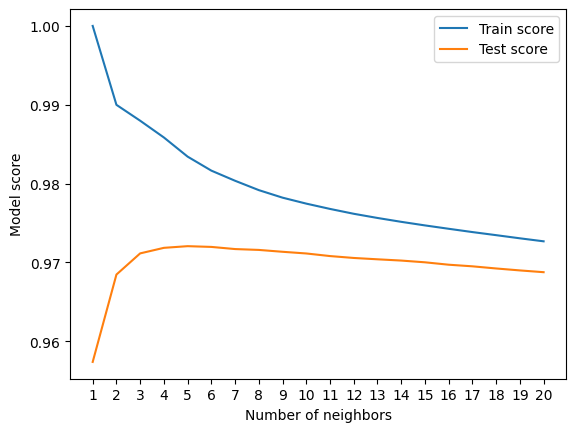

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparamter Tuning with RandomizedSearchCV

In [ ]:
# Define the parameter distribution to sample from
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}
dtree_reg = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(dtree_reg, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)


best_params_random = random_search.best_params_
best_score_random = random_search.best_score_
print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Score (Random Search): {best_score_random}")

Best Parameters (Random Search): {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 13}
Best Score (Random Search): 0.9862319126974535


In [ ]:
random_search.score(X_test, y_test)

0.9791111466553705

The below code demonstrates the use of Grid Search cross-validation for hyperparameter tuning in machine learning, specifically for an Extra Trees Regressor model.


In [ ]:
# Define the parameter distribution to sample from
# param_dist = {
#     'max_depth': randint(1, 20),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20)
# }

# This line creates an instance of the Extra Trees Regressor model
xt_clf = ExtraTreesRegressor(random_state=42)

# Parameter Space Definition
parameters = {
    'n_estimators': [10, 20, 50, 100, 200]
}

# we define the hyperparameter space to search. In this case, we're only tuning the n_estimators parameter, trying values from 10 to 200.
# The cv=5 parameter specifies 5-fold cross-validation.
clf = GridSearchCV(xt_clf, parameters, cv=5)
clf.fit(X_train, y_train)
best_params_random = clf.best_params_
best_score_random = clf.best_score_

print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Score (Random Search): {best_score_random}")

Best Parameters (Random Search): {'n_estimators': 200}
Best Score (Random Search): 0.9894639375065207


Cross-validation helps prevent overfitting by evaluating model performance across different subsets of the training data.

In [ ]:
clf.score(X_test,y_test)

0.9878469991546667

In [ ]:
# Make preidctions on test data
y_preds = clf.predict(X_test)

In [ ]:
tree_r2 = metrics.r2_score(y_test,y_preds)
print('ExtraTreesRegressor R2Score = {}'.format(round(tree_r2, 3)))

ExtraTreesRegressor R2Score = 0.988


### Test other Implementations

### Before Starting this section we should compile again the block code of:
 **df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clean_Dataset.csv')**

https://www.kaggle.com/code/ahmedlashin/notebook05a1951226

In [125]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clean_Dataset.csv')

In [126]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [127]:
numerical_col = [col for col in df.columns if df[col].dtype != 'O']

categorical_col = [col for col in df.columns if col not in numerical_col]

In [128]:
for col in categorical_col:

  print(f'{col} has {df[col].nunique()} unique values')

  print(df[col].unique())

  print('-'*100)

airline has 6 unique values
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
----------------------------------------------------------------------------------------------------
flight has 1561 unique values
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
----------------------------------------------------------------------------------------------------
source_city has 6 unique values
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
----------------------------------------------------------------------------------------------------
departure_time has 6 unique values
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
----------------------------------------------------------------------------------------------------
stops has 3 unique values
['zero' 'one' 'two_or_more']
----------------------------------------------------------------------------------------------------
arrival_time has 6 unique values
['Night' 'Morning' 

In [129]:
cleaned_df = df.copy()

In [130]:
for col in numerical_col:

  print(f'{col} has {cleaned_df[col].skew()} skewness')

Unnamed: 0 has 0.0 skewness
duration has 0.6028991297746269 skewness
days_left has -0.03546434955066582 skewness
price has 1.0613772532064343 skewness


### Differences between Negatively Skewed and Positively Skewed Distributions:
1. Shape:
* Negatively Skewed (Left-Skewed):
    * Longer tail on the left side
    * Most data points concentrated on the right side
    * Mean < Median < Mode
* Positively Skewed (Right-Skewed):
    * Longer tail on the right side
    * Most data points concentrated on the left side
    * Mode < Median < Mean
2. Extreme Values:
  * Negatively Skewed: More extreme values on the lower end
  * Positively Skewed: More extreme values on the higher end
3. Common Examples:
  * Negatively Skewed: Exam scores (most students score high, fewer low scores)
  * Positively Skewed: Income distributions (most people earn lower incomes, fewer high-income individuals)

**Applications of Negatively Skewed Distributions:**
1. Quality Control:
      * Monitoring manufacturing processes where defects are rare
      * Analyzing customer satisfaction ratings (most customers satisfied, few dissatisfied)
2. Financial Analysis:
      * Modeling stock returns (most days show small gains, occasional large losses)
      * Analyzing credit risk (most borrowers repay loans, few defaults)
3. Healthcare:
      * Studying disease severity (most cases mild, few severe)
      * Analyzing recovery time from treatments (most patients recover quickly, few take longer)
4. Education:
      * Exam score analysis (most students perform well, few struggle)
      * Time-to-degree completion (most students finish on time, few take longer)

**Applications of Positively Skewed Distributions:**
1. Income Analysis:
      * Studying wealth distribution in populations
      * Analyzing salary structures within organizations
2. Financial Markets:
      * Modeling stock prices (occasional large gains, most days show small changes)
      * Analyzing investment returns (most investments yield moderate returns, occasional outliers)
3. Customer Behavior:
      * Analyzing purchase frequency (most customers buy occasionally, few frequent buyers)
      * Studying customer lifetime value (most customers contribute moderately, few highly valuable)
4. Natural Phenomena:
      * Earthquake magnitudes (most earthquakes are small, occasional large ones)
      * Rainfall patterns (most days see light rain, occasional heavy rainfall events)
5. Network Science:
      * Degree distributions in social networks (most people have average connections, few highly connected individuals)
      * Web page popularity (most pages receive moderate traffic, few extremely popular)

**Understanding skewness is crucial in many fields because it affects statistical analysis, model selection, and interpretation of results. It also guides decisions about data transformation (e.g., using logarithmic scales for positively skewed data) and informs business strategies based on the nature of the underlying distribution.**

**Both types of skewness have important implications for decision-making, risk assessment, and resource allocation across various industries and scientific disciplines.**

The statement "flight has -0.6004775615100109 skewness" refers to the skewness measure of a dataset or distribution related to flights:
1. Negative Skewness: The skewness value (-0.6004775615100109) is negative. This indicates that the distribution of flight-related data is negatively skewed or left-skewed.
2. Interpretation of Negative Skewness:

  * Left-skewed distributions have a longer tail on the left side.
  * Most of the data points are concentrated on the right side of the distribution.
  * There are more extreme values on the lower end of the scale.
3. Magnitude of Skewness: The absolute value of the skewness (0.6004775615100109) is less than 1. This suggests a mild skewness rather than an extreme one.
4. Possible Implications:
  * Many flights might have shorter durations or distances, with fewer extremely long flights.
  * There could be a cap on the maximum duration or distance of flights, causing the right side of the distribution to be cut off.
  * The data might include a mix of short-haul and long-haul flights, with short-haul flights being more frequent.

In [131]:
#  computes the natural logarithm of one plus the input array element-wise. Its full name stands for "logarithm of 1 plus".

cleaned_df['price'] = np.log1p(cleaned_df['price'])

### the role and usage of log1p:
**np.log1p** plays a crucial role in **data preprocessing**, particularly for **handling zero values and transforming skewed distributions.** It's widely used in various fields including machine learning, statistics, and data science to prepare data for analysis or modeling.

By applying np.log1p to the price column, you're transforming the data in a way that's commonly used in financial modeling and economic analysis. This preprocessing step can lead to better-behaved data that's easier to model and analyze.

1. Mathematical Operation: np.log1p(x) is equivalent to log(1 + x). It adds 1 to each element of the input array and then takes the natural logarithm of the result.
2. Purpose:
      * Handling Zero Values: One of the primary reasons to use np.log1p is to avoid division by zero or logarithm of zero errors. By adding 1 to the input, it ensures that even when the original value is zero, the result is defined (log(1) = 0).
      * Data Transformation: It's commonly used for transforming skewed distributions, particularly those with many zeros or near-zero values, into more symmetric ones.
3. Common Applications:
      * Feature Scaling: In machine learning preprocessing, np.log1p is often applied to features that contain zeros or have highly skewed distributions.
      * Count Data: When dealing with count data (like word frequencies in natural language processing), np.log1p helps reduce the impact of extreme values.
      * Financial Data: It's useful for normalizing financial metrics that can have zero or negative values.

4. Advantages Over Simple Logarithm:
      * Avoids NaN (Not a Number) results for zero inputs.
      * Provides a smooth transformation for small positive numbers.
      * Helps in stabilizing variance in datasets with many small values.


In [132]:
for col in numerical_col:

  Q1 = cleaned_df[col].quantile(0.25)

  Q3 = cleaned_df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR

  upper_bound = Q3 + 1.5 * IQR

  outliers = cleaned_df[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)]

  print(f'Outliers in {col}:')

  print(outliers.shape)

Outliers in Unnamed: 0:
(0, 12)
Outliers in duration:
(2110, 12)
Outliers in days_left:
(0, 12)
Outliers in price:
(0, 12)


### Data Transformation:
1. Categorical Encoding
2. Data Skewed
3. Scaling

**Data transformation is the process of converting raw data into a format that is more suitable for analysis, visualization, or modeling.**

It involves changing the structure, format, or content of the data to meet specific requirements or to improve the quality of the data.

Types of Data Transformations:
1. Normalization:
  * Scaling numeric data to a common range (usually between 0 and 1) to ensure consistent units.
  * Example: Min-Max Scaling, Standardization (Z-score normalization).
2. Log Transformation:
  * Applying logarithms to reduce skewness in positively skewed distributions.
  * Useful for variables with many zero values or extreme outliers.
3. Encoding:
  * Converting categorical variables into numeric representations.
  * Examples: One-Hot Encoding, Label Encoding.
4. Aggregation:
  * Combining multiple rows into a single row based on certain criteria.
  * Example: Grouping sales data by region and calculating totals.
5. Feature Engineering:
  * Creating new features from existing ones to capture important information.
  * Example: Calculating age from birthdate, creating interaction terms.
6. Handling Missing Values:
  * Replacing missing data with imputed values or removing rows/columns with missing data.
7. Data Type Conversion:
  * Changing the data type of columns (e.g., converting text dates to datetime format).
8. Outlier Detection and Treatment:
  * Identifying and handling unusual data points that might affect analysis.

**Purpose of Data Transformation:**
1. Improving Model Performance:
    * Many machine learning algorithms assume normality or symmetry in input features.
    * Transformations can lead to better model fit and predictions.
2. Enhancing Interpretability:
    * Normalized data makes comparisons across different scales easier.
    * Log-transformed data can reveal patterns hidden in raw data.
3. Meeting Assumptions:
    * Statistical tests often require normally distributed data.
    * Transformations help meet these assumptions.
4. Dealing with Skewness:
    * Log transformations can convert highly skewed distributions to more symmetric ones.
5. Handling Non-linear Relationships:
    * Polynomial transformations can capture non-linear relationships between variables.

### 1. Categorical Encoding


In [133]:
cleaned_df['flight'].dtype

dtype('O')

In [134]:
cleaned_df['flight_number'] = cleaned_df['flight'].str.split('-').str[1]

cleaned_df['flight_number'] = pd.to_numeric(cleaned_df['flight_number'], errors='coerce')

In [135]:
print(cleaned_df['flight'].dtype)

object


In [136]:
print(cleaned_df['flight'].head())
print(cleaned_df['flight'].unique())

0    SG-8709
1    SG-8157
2     I5-764
3     UK-995
4     UK-963
Name: flight, dtype: object
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']


In [137]:
cleaned_df['flight'] = cleaned_df['flight'].astype(str)

In [138]:
# The code assumes that the flight numbers are always after the hyphen in the 'flight' column.
# errors='coerce': If a value cannot be converted to a number, it's replaced with NaN (Not a Number).
cleaned_df['flight_number'] = cleaned_df['flight'].str.split('-').str[1]
cleaned_df['flight_number'] = pd.to_numeric(cleaned_df['flight_number'], errors='coerce')

In [139]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [140]:
cleaned_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,8.691819,8709
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691819,8157
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,8.692322,764
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,8.692154,995
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,8.692154,963


In [141]:
cleaned_df.duplicated().sum()

0

In [142]:
cleaned_df.drop(columns=['flight'],inplace=True)

In [143]:
cleaned_df['airline'].dtype  # dtype('O') = Object

dtype('O')

In [144]:
cleaned_df['airline'].nunique()
cleaned_df['airline'].unique()
# array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo','Air_India'], dtype=object)

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [145]:
cleaned_df = pd.get_dummies(cleaned_df, columns=['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class'])

In [146]:
cleaned_df.columns

Index(['Unnamed: 0', 'stops', 'duration', 'days_left', 'price',
       'flight_number', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business',
       'class_Economy'],
      dtype='object')

In [147]:
cleaned_df['stops'] = cleaned_df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})

In [148]:
cleaned_df.head()

,Unnamed: 0,stops,duration,days_left,price,flight_number,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,0,2.17,1,8.691819,8709,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1,1,0,2.33,1,8.691819,8157,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
2,2,0,2.17,1,8.692322,764,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,3,0,2.25,1,8.692154,995,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,4,0,2.33,1,8.692154,963,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [149]:
for col in cleaned_df.columns:

  if cleaned_df[col].dtype == 'bool':

    cleaned_df[col] = cleaned_df[col].astype(int)

In [150]:
cleaned_df.head()

,Unnamed: 0,stops,duration,days_left,price,flight_number,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,0,2.17,1,8.691819,8709,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,2.33,1,8.691819,8157,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2,0,2.17,1,8.692322,764,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,0,2.25,1,8.692154,995,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,0,2.33,1,8.692154,963,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


### 2. Data Skewed


In [151]:
numerical_col = [col for col in cleaned_df.columns if cleaned_df[col].dtype != 'O']

categorical_col = [col for col in cleaned_df.columns if col not in numerical_col]

In [152]:
for col in numerical_col:

  print(f'{col} has {cleaned_df[col].skew()} skewness')

Unnamed: 0 has 0.0 skewness
stops has -0.6223632829321687 skewness
duration has 0.6028991297746269 skewness
days_left has -0.03546434955066582 skewness
price has 0.40452027498368964 skewness
flight_number has 2.8155921434850284 skewness
airline_AirAsia has 3.9625987353046543 skewness
airline_Air_India has 1.0389807253400491 skewness
airline_GO_FIRST has 3.168038347495886 skewness
airline_Indigo has 2.03191497090746 skewness
airline_SpiceJet has 5.50825520107041 skewness
airline_Vistara has 0.29938264864368913 skewness
source_city_Bangalore has 1.7249014715476891 skewness
source_city_Chennai has 2.214488528535776 skewness
source_city_Delhi has 1.4662601049462294 skewness
source_city_Hyderabad has 2.1243812978675884 skewness
source_city_Kolkata has 1.912813790886483 skewness
source_city_Mumbai has 1.4776628649296133 skewness
departure_time_Afternoon has 1.8626763998345788 skewness
departure_time_Early_Morning has 1.3342433795582391 skewness
departure_time_Evening has 1.3738602773776425 s

### Concise Comparison of StandardScaler, MinMaxScaler, and RobustScaler:

**StandardScaler:**
  1. Functionality: Standardizes features by removing the mean and scaling to unit variance. It transforms the data to have a mean of 0 and a standard deviation of 1.
  2. Formula: X_scaled = (X - μ) / σ
    * where μ is the mean and σ is the standard deviation.
  3. Use Case: Best suited for normally distributed data. It can be negatively affected by outliers, as they can skew the mean and standard deviation, leading to a distorted view of the data distribution.
  4. Performance: Works well when the data is normally distributed but may perform poorly with datasets containing extreme outliers.
  5. Advantages:
    * Preserves the relative importance of features.
    * Useful when features are on different scales.
  6. Disadvantages:
    * Can amplify noise in skewed distributions.
    * May not work well with outliers.


****************************************************
**MinMaxScaler:**
1. Functionality: Scales features to a specified range, typically [0, 1]. It transforms each feature by scaling it to fit within this range.
2. Formula: X_scaled = (X - X_min) / (X_max - X_min)
    * where XminXmin​ and XmaxXmax​ are the minimum and maximum values of the feature.
3. Use Case: Useful when features have different ranges and you want to bring them into a common scale. However, it is sensitive to outliers; extreme values can compress all other values into a narrow range.
4. Performance: Performs poorly with datasets that contain extreme outliers, as these can skew the scaling process.
5. Advantages:
  * Simple to understand and implement.
  * Ensures all features are on the same scale.
6. Disadvantages:
  * Doesn't preserve the relative importance of features.
  * Can lead to loss of information due to clamping at boundaries.

****************************************************
**RobustScaler:**
1. Functionality: Scales features using statistics that are robust to outliers, specifically the median and interquartile range (IQR).
2. Formula: X_scaled = (X - Q1 - 3 * IQR) / (Q3 - Q1 - 3 * IQR) Where Q1 and Q3 are quartiles, and IQR is interquartile range.
3. Use Case: Ideal for datasets with significant outliers. It reduces the influence of outliers on the scaling process by focusing on the central portion of the data.
4. Performance: Provides better results than StandardScaler or MinMaxScaler when dealing with outliers, as it maintains the relative distances between data points more effectively.
5. Advantages:
  * Robust to outliers.
  * Preserves relative importance of features.
  * Works well with skewed distributions.
6. Disadvantages:
  * More computationally expensive than StandardScaler or MinMaxScaler.
  * May not be suitable for features with very few samples.
*****************************************************
**Key Differences:**
1. Handling Outliers:
      * StandardScaler: Not robust to outliers.
      * MinMaxScaler: Not designed to handle outliers.
      * RobustScaler: Designed to handle outliers.
2. Data Distribution:
      * StandardScaler: Assumes normal distribution.
      * MinMaxScaler: Assumes uniform distribution.
      * RobustScaler: Handles heavy-tailed distributions.
3. Feature Importance:
      * StandardScaler: Preserves feature importance.
      * MinMaxScaler: Does not preserve feature importance.
      * RobustScaler: Preserves feature importance.
4. Computational Complexity:
      * StandardScaler: Least complex.
      * MinMaxScaler: Moderate complexity.
      * RobustScaler: Most complex.

**Use Cases:**
1. StandardScaler:
      * When data is normally distributed and you want to preserve feature importance.
      * For linear models that assume Gaussian noise.
2. MinMaxScaler:
      * When you need to ensure all features are on the same scale.
      * For neural networks that typically work best with inputs in a fixed range.
3. RobustScaler:
      * When dealing with datasets containing outliers.
      * For features with skewed distributions.
      * When preserving feature importance is crucial.

### 3. Scaling


In [153]:
copy1 = cleaned_df.copy() # with StandardScaler()

copy2 = cleaned_df.copy() # with MinMaxScaler()

copy3 = cleaned_df.copy() # with RobustScaler()

copy4 = cleaned_df.copy() # without Scalling

### Spliting on copy1

In [154]:
X = copy1.drop(['price'], axis = 1)
y = copy1['price']

X_train_C1, X_test_C1, y_train_C1, y_test_C1 = train_test_split(X, y, train_size = 0.7, random_state = 42)

### StandardScaler()

In [155]:
scaler = StandardScaler()
X_train_C1 = scaler.fit_transform(X_train_C1)
X_test_C1 = scaler.transform(X_test_C1)

### Spliting on copy2


In [156]:
X = copy2.drop(['price'], axis = 1)
y = copy2['price']

X_train_C2, X_test_C2, y_train_C2, y_test_C2 = train_test_split(X, y, train_size = 0.7, random_state = 42)

### MinMaxScaler()

In [157]:
min_max = MinMaxScaler()
X_train_C2 = min_max.fit_transform(X_train_C2)
X_test_C2 = min_max.transform(X_test_C2)

### Spliting on copy3

In [158]:
X = copy3.drop(['price'], axis = 1)
y = copy3['price']

X_train_C3, X_test_C3, y_train_C3, y_test_C3 = train_test_split(X, y, train_size = 0.7, random_state = 42)

### RobustScaler()

In [159]:
rob = RobustScaler()
X_train_C3 = rob.fit_transform(X_train_C3)
X_test_C3 = rob.transform(X_test_C3)

### Principal component analysis (PCA)

1. PCA is an **unsupervised machine learning technique**.
2. Perhaps the most popular use of PCA is dimensionality reduction.
3. Besides using PCA as a **data preparation technique**, we can also use it to help visualize data.
4. PCA comes under the **Unsupervised Machine Learning category**
5. Reducing the number of variables in a data collection while retaining as much information as feasible is the main goal of PCA.
6. PCA can be mainly **used for Dimensionality Reduction** and also for **important feature selection**.
7. Correlated features to Independent features
8. PCA is not required unless you have **a dataset with a large number of attributes.**
9. Generally, when we deal with real-world data we encounter a huge messy dataset with a large number of attributes.
10. If we apply any Machine Learning model on a huge dataset without reducing its dimensions then it would be computationally expensive.
11. PCA can not be applied to the dataset with null values. Hence, you need to treat null values before proceeding with PCA.   
12. There are different ways of treating null values such as dropping the variables and imputing the missing data using mean or median.
13. **We shouldn’t apply PCA on the dataset having attributes on different scales. We need to standardize variables before applying PCA.**
14. Unless specified, **the number of principal components will be equal to the number of attributes.**
15. **Our dataset has 12 attributes** initially hence **we get 12 principal components**. These components are new variables which are in fact a linear combination of input variables. **len(df.columns)**
16. Principal components are uncorrelated with each other.
17. These principal components are known as **eigenvectors** and the **variances explained by each eigenvector** is known as **eigenvalues.**
18. **Covariance:** With covariance, we can estimate the degree to which analogous components from a couple of sets of grouped data move in an identical direction.
19. **Covariance** is used to identify the dependencies and relationships between the characteristics of datasets.
20. **PCA is sensitive to the scale,** if we normalized each feature by StandardScaler we can see a better result.
21. **PCA is sensitive to the scale of the data,** and if the data is not scaled properly, the results of PCA may not be accurate.
22. **It is recommended to normalize each feature by StandardScaler before applying PCA to the data.**
23. This will ensure that the different features are on the same scale and will result in a better PCA result.
24. By scaling the data before PCA, the different classes in the dataset become more distinctive, which makes it easier for a simple model such as SVM to classify the dataset with high accuracy.
25. **The difference between normalized PCA and non-normalized PCA** can be seen in the plot of the transformed data.
26. If the data is not scaled before PCA, the different classes may overlap, making it difficult to distinguish between them.
27. PCA analysis helps you reduce or eliminate similar data in the line of comparison that does not even contribute a bit to decision making. You have to be clear that PCA analysis reduces dimensionality without any data loss.

### Applying PCA to Standard Scaled Data copy 1

In [160]:
# Applying PCA to Standard Scaled Data copy 1
pca = PCA(n_components=0.95)

Pca = pca.fit_transform(X_train_C1)

pca_std_Train = pd.DataFrame(Pca)

In [161]:
pca_std_Train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.766577,1.993512,-0.144199,1.116654,0.249549,-1.431271,-1.755830,1.538268,0.761700,1.152361,...,-0.370184,-0.473315,-0.446214,-1.013265,0.264951,0.480659,-0.685862,0.707667,-0.492669,1.179025
1,2.762284,-2.404558,0.791622,-1.508255,-0.131028,-0.061038,-0.395253,1.035165,-0.541611,-0.383498,...,0.544455,-0.395206,-0.246614,-0.056021,-0.875344,0.880467,1.825265,0.274599,-0.413841,0.687705
2,2.994137,-1.062713,0.622111,-1.860253,-1.228232,-1.288490,0.722093,1.196747,0.870045,-1.004851,...,-0.316173,-0.092358,0.790396,-0.253894,0.947389,-1.010238,0.164872,-0.276360,-0.637865,-0.097618
3,-1.348981,1.224711,2.210452,1.450816,1.678634,-0.583972,-0.642872,-0.380952,0.517652,-0.340180,...,0.196994,-0.305099,-1.189031,-0.276495,-0.120638,0.783877,-0.266937,-1.305005,-0.449284,0.128513
4,-1.597719,-1.225649,-0.037612,-0.517710,-0.731797,0.441051,-1.387830,-2.350338,-0.070430,-1.222215,...,-0.349427,1.101335,1.513760,0.457829,-1.481770,-0.521872,-0.459618,-1.317010,-0.525648,0.030668


In [162]:
Pca = pca.transform(X_test_C1)
pca_std_Test = pd.DataFrame(Pca)


In [163]:
pca_std_Test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.323459,2.782322,0.332910,0.296695,-1.505842,-0.819677,0.767261,0.787718,0.042159,-0.196252,...,0.475301,0.614496,0.745305,0.438773,0.242841,-0.076006,1.141315,-1.109545,1.268905,2.411524
1,2.594928,-1.748752,1.211080,2.216131,-0.602390,0.478061,-1.299540,-0.610341,-0.129450,0.652483,...,-0.402681,1.025947,0.683624,1.259356,1.655198,-0.668259,-0.161235,0.900696,0.190598,0.644535
2,-0.133823,-0.640697,2.173809,0.792205,0.459584,1.896436,-1.665971,-0.096387,0.411061,1.309332,...,-0.693465,1.266463,0.046203,1.469387,0.522525,-0.281470,-0.302276,-1.050730,0.095827,0.019935
3,3.261951,-1.072984,-1.951092,-0.900086,1.201352,-0.087817,-1.162482,1.036585,0.142762,1.042500,...,-0.349252,-0.239024,0.327893,-1.922363,-0.470607,-0.142877,-0.138315,-0.619670,-0.470535,0.875041
4,-0.967329,-0.138476,-0.200714,2.013280,-1.481490,0.698828,0.152640,-1.237054,-0.609472,-2.071808,...,-1.054864,0.196434,-0.739468,-0.265035,-0.365972,0.497877,-0.955496,-0.354092,1.395767,-0.508115


### Applying PCA to MinMaxScaler Data copy 2

In [164]:
# Applying PCA to Min Max scaled data copy 2

pca = PCA(n_components=0.95)

Pca = pca.fit_transform(X_train_C2)

pca_norm_Train = pd.DataFrame(Pca)

In [165]:
pca_norm_Train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.247237,-0.377560,-0.057586,1.165689,0.529513,-0.598874,-0.184041,-0.748627,0.208233,0.251968,...,-0.743897,0.233308,0.262183,-0.003917,-0.400243,0.176808,-0.143051,-0.368183,-0.166355,-0.038763
1,-1.257344,-0.652515,-0.466888,-0.937023,-0.048661,-0.012241,-0.499966,-0.015936,-0.095076,0.070575,...,-0.350382,-0.021207,-0.193726,-0.282610,-0.001250,-0.270724,-0.675364,0.053299,-0.100252,0.011514
2,-1.259540,-0.407940,-0.764643,-0.355222,0.197113,-0.138217,0.905027,0.190811,-0.164008,0.440683,...,0.370492,-0.250881,-0.037958,-0.538236,-0.170404,0.353833,0.300754,0.171726,0.031232,-0.008215
3,0.335398,-0.559262,0.869845,0.926930,0.484470,0.565759,0.055422,0.201336,-0.063574,-0.495084,...,-0.375094,-0.300703,-0.342622,0.174327,-0.032545,-0.037603,0.051389,-0.370058,-0.118262,-0.085384
4,0.635245,-0.219337,0.628659,-0.767426,-0.480956,-0.290080,-0.494975,0.479144,0.585530,0.063807,...,-0.435954,-0.474998,-0.201128,0.513329,-0.184811,0.265297,-0.127116,0.756071,0.156178,-0.537120


In [166]:
Pca = pca.transform(X_test_C2)

pca_norm_Test = pd.DataFrame(Pca)

pca_norm_Test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.677576,0.506502,-0.249344,-0.128755,0.898843,0.443290,-0.376749,-0.029986,0.801932,0.467090,...,-0.306252,-0.216921,-0.258784,-0.278881,0.336730,0.397903,0.029549,0.181773,0.304439,0.282987
1,-1.192523,-0.311228,1.059231,-0.528315,0.372561,-0.425657,-0.421900,-0.251966,0.167079,-0.323176,...,0.248124,0.368140,0.392354,-0.006257,0.128664,0.675918,-0.104629,0.122905,0.332584,0.076449
2,0.113784,-0.800017,0.901012,-0.324721,0.060498,0.266965,-0.413462,-0.657122,0.193079,-0.625464,...,0.295251,-0.354422,-0.190603,0.290274,0.354616,0.468705,0.125259,-0.077420,0.353628,-0.027850
3,-1.307507,-0.104000,-0.314228,0.368664,-0.839704,-0.502805,-0.451441,-0.601357,-0.194973,0.351338,...,-0.395887,-0.317818,-0.029070,-0.398074,-0.741411,0.081333,0.173378,-0.057470,-0.271079,-0.120708
4,0.569477,0.679100,0.868947,-0.332780,0.216132,-0.484977,0.113773,0.425197,-0.221815,0.409056,...,-0.329410,-0.362237,0.577278,0.592534,0.206268,-0.221003,0.322562,-0.267874,-0.030228,0.022536


### Applying PCA to Robust Scaled Data copy 3

In [167]:
# Applying PCA to Robust scaled data copy 3

pca = PCA(n_components=0.95)

Pca = pca.fit_transform(X_train_C3)

pca_rob_Train = pd.DataFrame(Pca)

In [168]:
pca_rob_Train.head(5)

,0,1,2,3,4,5,6,7,8
0,-1.879911,-0.586285,0.763400,-0.524659,0.510323,0.186118,1.006414,0.083134,-0.881281
1,-1.911910,0.879749,-1.229393,-0.211299,0.621232,-0.608457,-0.670105,0.121576,0.116506
2,-2.068277,1.071681,-1.011076,0.079519,0.482909,-0.807353,-0.152709,0.308440,-0.080997
3,-1.573453,-1.161969,0.061685,-0.544306,0.555963,1.052798,0.792868,0.440370,0.208601
4,-1.853477,-0.701934,0.171207,0.816411,0.035149,0.487921,-0.903904,-0.424583,0.024214


In [169]:
Pca = pca.transform(X_test_C3)

pca_rob_Test = pd.DataFrame(Pca)

pca_rob_Test.head(5)

,0,1,2,3,4,5,6,7,8
0,-3.130802,-0.378789,1.354262,0.661183,-0.313502,-0.121913,-0.107869,0.991661,0.084835
1,-2.490825,0.783431,-1.197682,0.611017,0.259492,0.966532,-0.532679,0.308052,-0.440218
2,-2.224687,-0.359283,-0.151665,0.591483,0.698444,0.912446,-0.638987,0.021925,0.150885
3,-2.100466,1.323374,-0.718005,-0.479640,0.138772,-0.323765,0.390470,-0.991784,-0.206262
4,-3.130339,-0.764308,0.133902,-0.252453,-0.850693,0.762392,-0.494191,0.103185,-0.458521


### Spliting on copy4 (No scaling only pca)

In [170]:
X = copy4.drop(['price'], axis = 1)

y = copy4['price']

X_train_CL, X_test_CL, y_train_CL, y_test_CL = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [171]:
# Applying PCA to normal data

pca = PCA(n_components=0.95)

Pca = pca.fit_transform(X_train_CL)

pca_clean_Train = pd.DataFrame(Pca)

pca_clean_Train.head(5)

,0
0,-147624.402071
1,125832.653570
2,147123.661019
3,-137204.791674
4,-56865.051109


In [172]:
Pca = pca.transform(X_test_CL)

pca_clean_Test = pd.DataFrame(Pca)

pca_clean_Test.head(5)

,0
0,-122898.204313
1,116825.348971
2,-8803.011130
3,138296.753507
4,-52695.681965


### Modeling

#### 1st: RandomForestRegressor
* RandomForestRegressor on **original dataset**
* RandomForestRegressor on **copy1 dataset 'Standardization**
* RandomForestRegressor on **copy2 dataset 'Normalization'**
* RandomForestRegressor on **copy3 dataset 'Robust scaler'**
* RandomForestRegressor on **pca of standard scaler**
* RandomForestRegressor on **pca of normalizarion scaling**
* RandomForestRegressor on **pca of Robust scaling**
* RandomForestRegressor on **pca of original dataset**


*******************************************************

#### 2st: Linear Regression
* Linear regressin on the cleaned_df dataset (Without any scaling or PCA)
* Linear regression on Copy1 (Standared Scaler)
* Linear rgression on copy2 (Min MAx scaler)
* linear regression on copy3 (robust scaler)
* Linear Regression on PCA of copy1 (PCA on standared Scale Dataset)
* linear regression on PCA of copy2 (PCA scaled in Min max scaler)
* Linear regression on PCA of copy3 (PCA scaled using Robust scaler)
* linear regression on the main dataframe without any scaling but PCA applied

*******************************************************

#### 3rd: XGBRegressor()
* xgboost on the cleaned_df dataset (Without any scaling or PCA)
* xgboost on Standard Scaler for C1
* xgboost on MinMax Scaler for C2
* xgboost on Robust Scaler for C3
* xgboost on PCA of copy1 (PCA on standared Scale Dataset)
* xgboost on PCA of copy2 (PCA scaled in Min max scaler)
* xgboost on PCA of copy3 (PCA scaled using Robust scaler)
* xgboost on the main dataframe without any scaling but PCA applied



### 1st: Random Forest


##### Modeling on original dataset

In [173]:
# splitting on original data

X = cleaned_df.drop(['price'], axis = 1)

y = cleaned_df['price']

X_train_OR, X_test_OR, y_train_OR, y_test_OR = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [174]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_OR, y_train_OR)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.0017668187145734007
R-squared on train: 0.9985725084998063
------------------------------------------------------
Mean Squared Error on test: 0.012225845216017323
R-squared on test: 0.9901310534790634


<ipython-input-175-c15fe389e5bb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


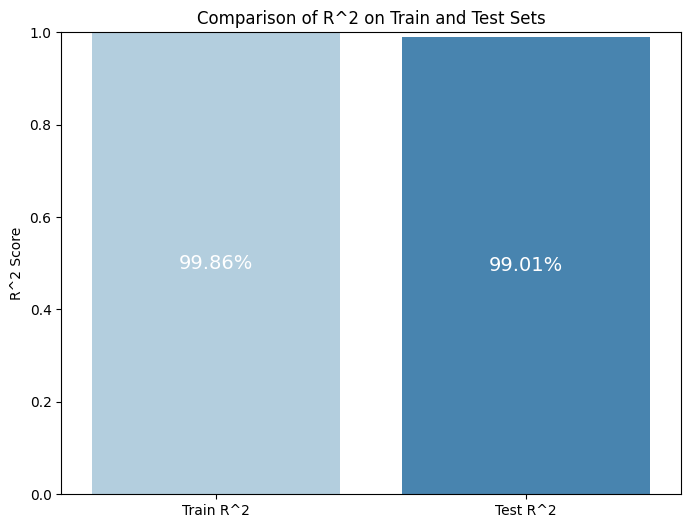

In [175]:
# Predict values for train and test sets
y_pred_OR_train = rf_model.predict(X_train_OR)
y_pred_OR_test = rf_model.predict(X_test_OR)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_OR, y_pred_OR_train)
r2_train = r2_score(y_train_OR, y_pred_OR_train)

mse_test = mean_squared_error(y_test_OR, y_pred_OR_test)
r2_test = r2_score(y_test_OR, y_pred_OR_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

# Barplot to compare Train and Test R2 scores
r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on copy1 dataset 'Standardization'

In [176]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_C1, y_train_C1)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.001764750716125489
R-squared on train: 0.9985741793278219
------------------------------------------------------
Mean Squared Error on test: 0.012206059796510165
R-squared on test: 0.9901470246649863


<ipython-input-177-171a48914d63>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


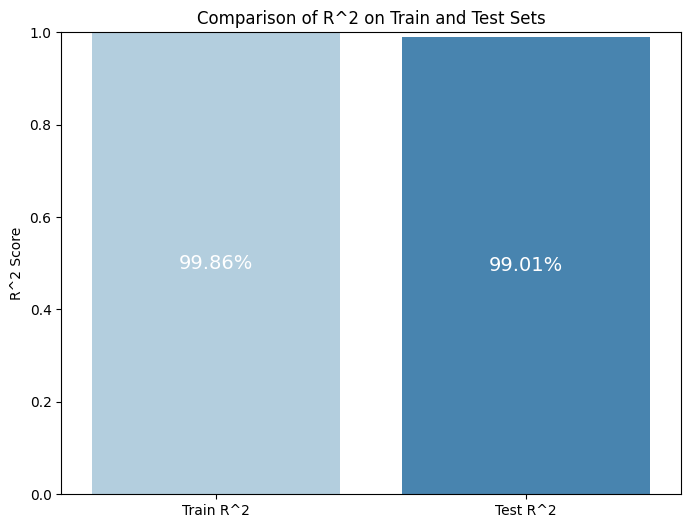

In [177]:
# Predicting on the training and test sets
y_pred_C1_train = rf_model.predict(X_train_C1)
y_pred_C1_test = rf_model.predict(X_test_C1)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C1, y_pred_C1_train)
r2_train = r2_score(y_train_C1, y_pred_C1_train)
mse_test = mean_squared_error(y_test_C1, y_pred_C1_test)
r2_test = r2_score(y_test_C1, y_pred_C1_test)

# Print metrics
print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on copy2 dataset 'Normalization'

In [178]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_C2, y_train_C2)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.001763864894888482
R-squared on train: 0.998574895022237
------------------------------------------------------
Mean Squared Error on test: 0.01220490302345523
R-squared on test: 0.9901479584353077


<ipython-input-179-7033627fa6b0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


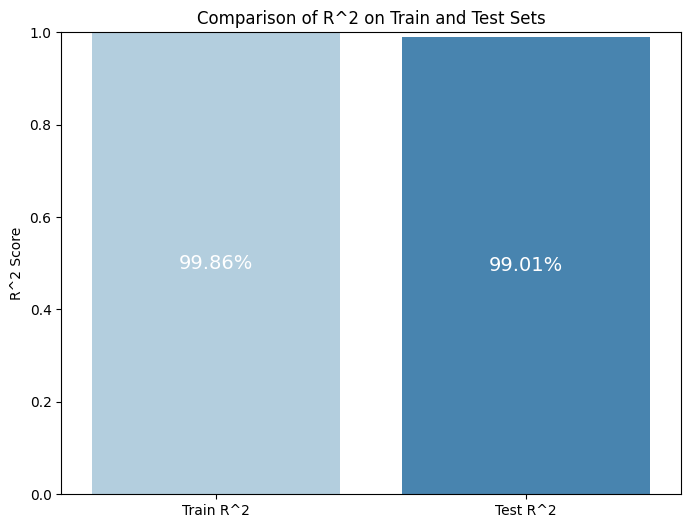

In [179]:
# Predicting on the training and test sets
y_pred_C2_train = rf_model.predict(X_train_C2)
y_pred_C2_test = rf_model.predict(X_test_C2)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C2, y_pred_C2_train)
r2_train = r2_score(y_train_C2, y_pred_C2_train)
mse_test = mean_squared_error(y_test_C2, y_pred_C2_test)
r2_test = r2_score(y_test_C2, y_pred_C2_test)

# Print metrics
print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on copy3 dataset 'Robust scaler'

In [180]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_C3, y_train_C3)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.0017639498169798248
R-squared on train: 0.9985748264098985
------------------------------------------------------
Mean Squared Error on test: 0.012219405827177399
R-squared on test: 0.9901362514823887


<ipython-input-181-f2ed41db5b61>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


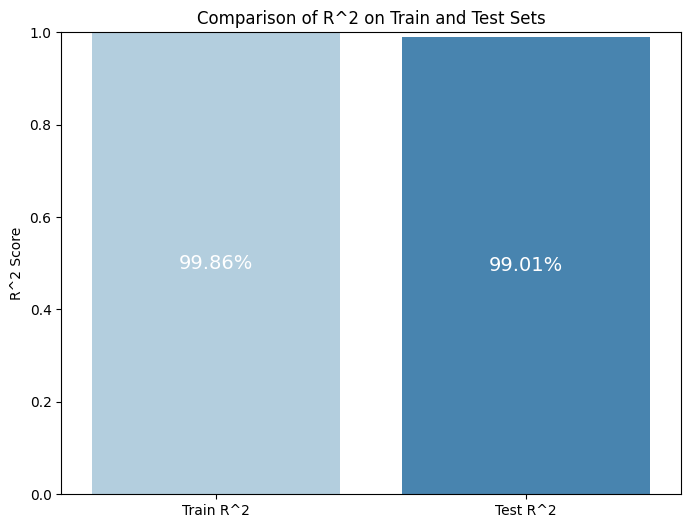

In [181]:
# Predicting on the training and test sets
y_pred_C3_train = rf_model.predict(X_train_C3)
y_pred_C3_test = rf_model.predict(X_test_C3)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C3, y_pred_C3_train)
r2_train = r2_score(y_train_C3, y_pred_C3_train)
mse_test = mean_squared_error(y_test_C3, y_pred_C3_test)
r2_test = r2_score(y_test_C3, y_pred_C3_test)

# Print metrics
print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on pca of standard scaler

In [182]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_std_Train, y_train_C1)


RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.004446715737257118
R-squared on train: 0.9964073003832512
------------------------------------------------------
Mean Squared Error on test: 0.024541322924431362
R-squared on test: 0.9801897538194788


<ipython-input-183-2d1b9eb9626c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


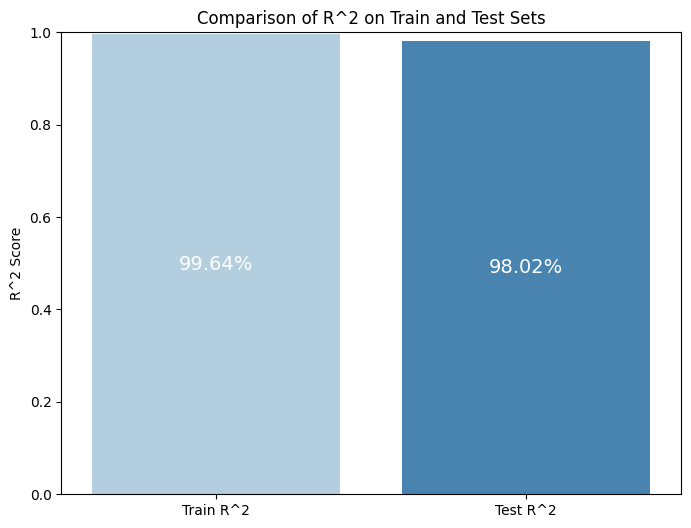

In [183]:
# Predicting on the training and test sets after PCA
y_pred_pca1_train = rf_model.predict(pca_std_Train)
y_pred_pca1_test = rf_model.predict(pca_std_Test)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C1, y_pred_pca1_train)
r2_train = r2_score(y_train_C1, y_pred_pca1_train)
mse_test = mean_squared_error(y_test_C1, y_pred_pca1_test)
r2_test = r2_score(y_test_C1, y_pred_pca1_test)

# Print metrics
print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on pca of normalizarion scaling

In [184]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_norm_Train, y_train_C2)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.004332273681904236
R-squared on train: 0.9964997632148556
------------------------------------------------------
Mean Squared Error on test: 0.024088288139260377
R-squared on test: 0.98055545254934


<ipython-input-185-19dd4c2648bc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


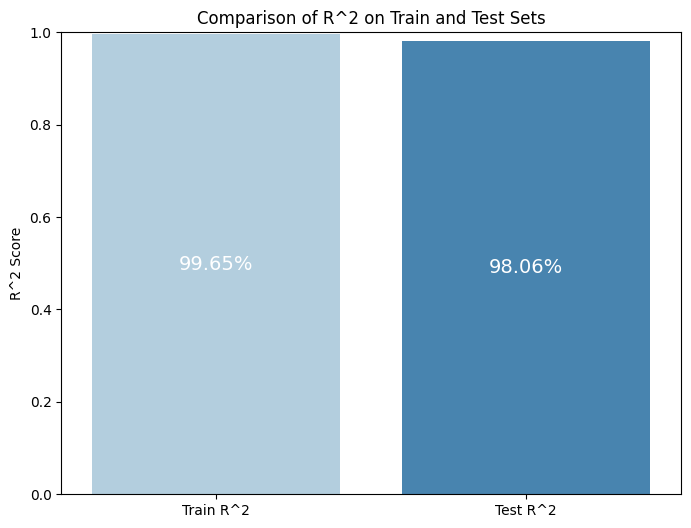

In [185]:
# Predicting on the training and test sets using PCA-normalized data
y_pred_pca2_train = rf_model.predict(pca_norm_Train)
y_pred_pca2_test = rf_model.predict(pca_norm_Test)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C2, y_pred_pca2_train)
r2_train = r2_score(y_train_C2, y_pred_pca2_train)
mse_test = mean_squared_error(y_test_C2, y_pred_pca2_test)
r2_test = r2_score(y_test_C2, y_pred_pca2_test)

# Print metrics
print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on pca of Robust scaling

In [186]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_rob_Train, y_train_C3)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.004108898447646016
R-squared on train: 0.9966802380115211
------------------------------------------------------
Mean Squared Error on test: 0.022609683440091864
R-squared on test: 0.9817490118038431


<ipython-input-187-7ffe77f7d02e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


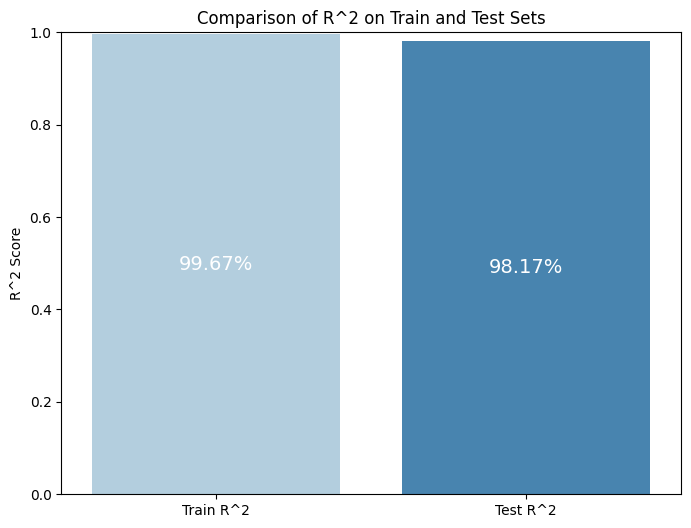

In [187]:
y_pred_pca3_train = rf_model.predict(pca_rob_Train)

y_pred_pca3_test = rf_model.predict(pca_rob_Test)



# Evaluate the model's performance

mse_train = mean_squared_error(y_train_C3, y_pred_pca3_train)

r2_train = r2_score(y_train_C3, y_pred_pca3_train)

mse_test = mean_squared_error(y_test_C3, y_pred_pca3_test)

r2_test = r2_score(y_test_C3, y_pred_pca3_test)



print("Mean Squared Error on train:", mse_train)

print("R-squared on train:", r2_train)

print("------------------------------------------------------")

print("Mean Squared Error on test:", mse_test)

print("R-squared on test:", r2_test)


r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Modeling on pca of original dataset

In [188]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_clean_Train, y_train_CL)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.012271946303943628
R-squared on train: 0.9900849482206534
------------------------------------------------------
Mean Squared Error on test: 0.07261339312080994
R-squared on test: 0.9413850183156115


<ipython-input-190-26fab038e083>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_scores, palette='Blues')


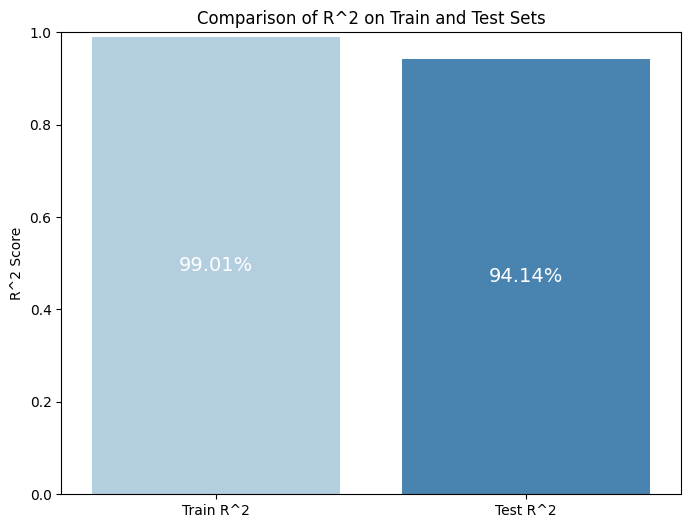

In [190]:
y_pred_pca4_train = rf_model.predict(pca_clean_Train)

y_pred_pca4_test = rf_model.predict(pca_clean_Test)


# Evaluate the model's performance
mse_train = mean_squared_error(y_train_CL, y_pred_pca4_train)

r2_train = r2_score(y_train_CL, y_pred_pca4_train)

mse_test = mean_squared_error(y_test_CL, y_pred_pca4_test)

r2_test = r2_score(y_test_CL, y_pred_pca4_test)



print("Mean Squared Error on train:", mse_train)

print("R-squared on train:", r2_train)

print("------------------------------------------------------")

print("Mean Squared Error on test:", mse_test)

print("R-squared on test:", r2_test)


r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### 2st: Linear Regression



### Linear Regressin on the cleaned_df dataset (Without any scaling or PCA)

In [199]:
# Creating and fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Train RMSE: 0.32606541482720425, Train R²: 0.9141004254082629
Test RMSE: 0.3237958992251041, Test R²: 0.9153680025740493


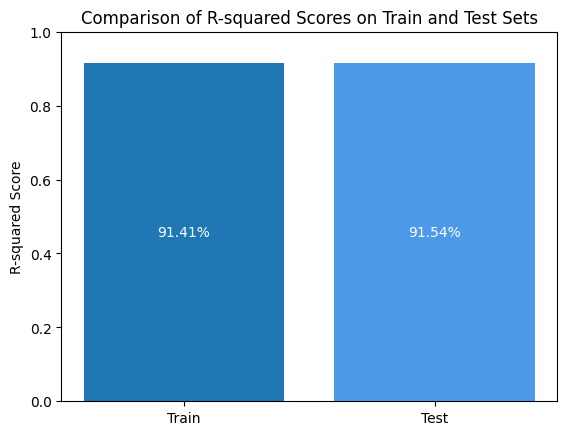

In [194]:
# Making predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluating the model's performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Printing metrics
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')  # Display as percentage with 2 decimal places

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Linear regression on Copy1 (Standared Scaler)

In [195]:
# Fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_C1, y_train_C1)

LinearRegression()

Train RMSE: 0.326071112600906, Train R²: 0.9140974233075118
Test RMSE: 0.3238047532493767, Test R²: 0.9153633740780966


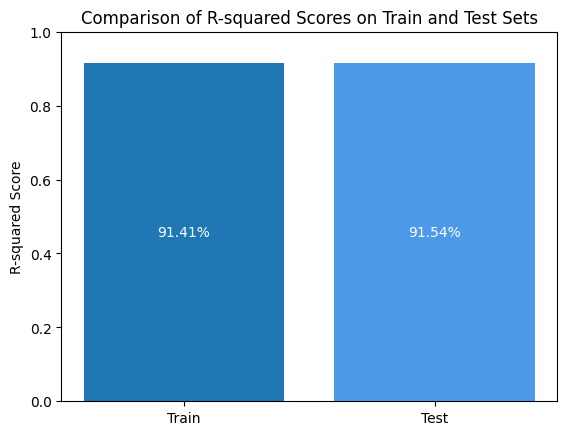

In [197]:
# Making predictions
y_train_pred = lr_model.predict(X_train_C1)
y_test_pred = lr_model.predict(X_test_C1)

# Calculating performance metrics for training set
train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

# Calculating performance metrics for test set
test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C1, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')  # Display as percentage with 2 decimal places

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Linear rgression on copy2 (Min MAx scaler)


In [202]:
# Fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_C2, y_train_C2)

LinearRegression()

Train RMSE: 0.32606545068408227, Train R²: 0.9141004065157916
Test RMSE: 0.32379596731312627, Test R²: 0.9153679669810975


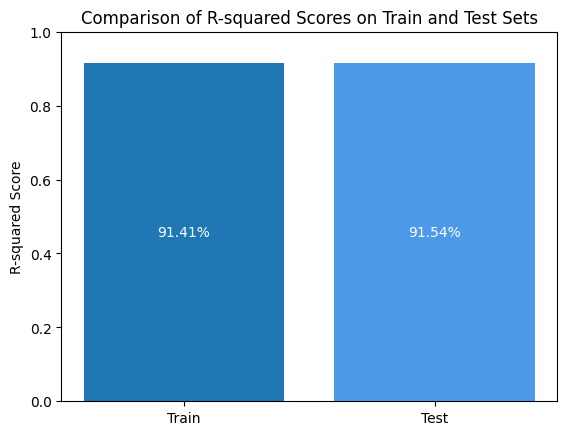

In [203]:
# Making predictions
y_train_pred = lr_model.predict(X_train_C2)
y_test_pred = lr_model.predict(X_test_C2)

# Calculating performance metrics for training set
train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

# Calculating performance metrics for test set
test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### linear regression on copy3 (robust scaler)

In [205]:
# Fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_C3, y_train_C3)

LinearRegression()

Train RMSE: 0.3260654148272042, Train R²: 0.9141004254082629
Test RMSE: 0.323795899225104, Test R²: 0.9153680025740494


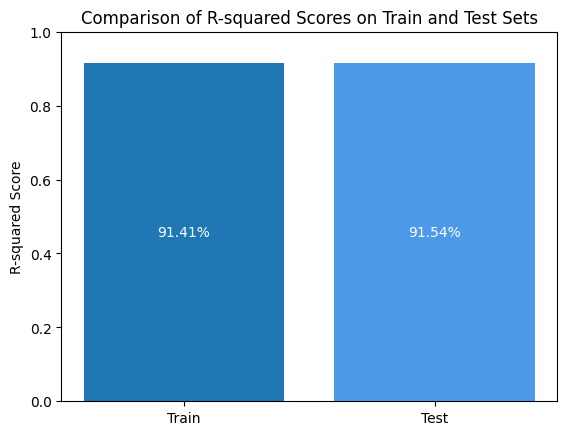

In [207]:
# Making predictions
y_train_pred = lr_model.predict(X_train_C3)
y_test_pred = lr_model.predict(X_test_C3)

# Calculating performance metrics for training set
train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

# Calculating performance metrics for test set
test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Linear Regression on PCA of copy1 (PCA on standared Scale Dataset)

In [208]:
# Fit the Linear Regression model on PCA-transformed training data
lr_model = LinearRegression()
lr_model.fit(pca_std_Train, y_train_C1)

LinearRegression()

Train RMSE: 0.34200342164888614, Train R²: 0.9054976861064166
Test RMSE: 0.3393193590358646, Test R²: 0.9070586067920772


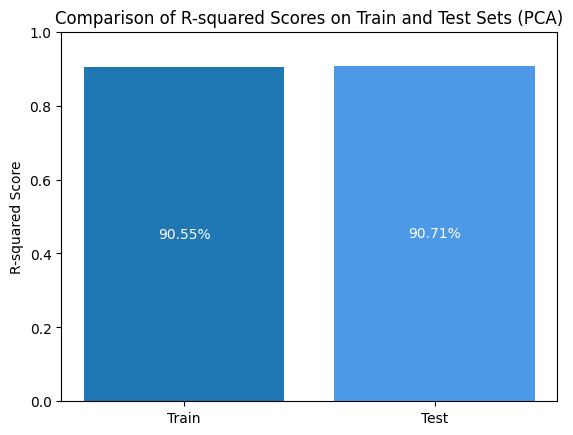

In [209]:
# Making predictions
y_train_pred = lr_model.predict(pca_std_Train)
y_test_pred = lr_model.predict(pca_std_Test)

# Calculating performance metrics for the training set
train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

# Calculating performance metrics for the test set
test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C1, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### linear regression on PCA of copy2 (PCA scaled in Min max scaler)

In [210]:
# Fit the Linear Regression model on PCA-normalized training data
lr_model = LinearRegression()
lr_model.fit(pca_norm_Train, y_train_C2)

LinearRegression()

Train RMSE: 0.36607017833437083, Train R²: 0.8917294752071757
Test RMSE: 0.36449255904790084, Test R²: 0.8927569304419356


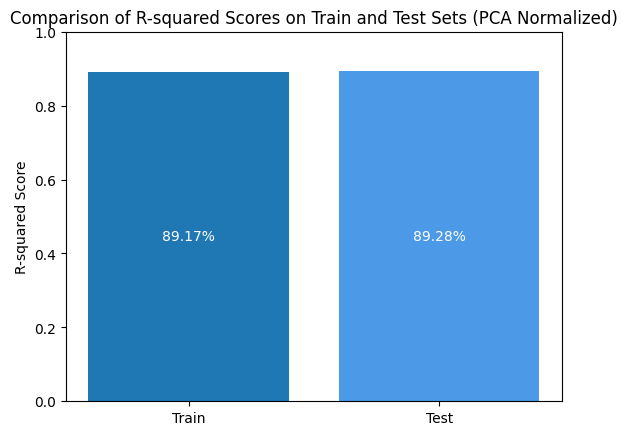

In [212]:
# Making predictions
y_train_pred = lr_model.predict(pca_norm_Train)
y_test_pred = lr_model.predict(pca_norm_Test)

# Calculating performance metrics for the training set
train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

# Calculating performance metrics for the test set
test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA Normalized)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Linear regression on PCA of copy3 (PCA scaled using Robust scaler)

In [213]:
# Fit the Linear Regression model on PCA-robust training data
lr_model = LinearRegression()
lr_model.fit(pca_rob_Train, y_train_C3)

LinearRegression()

Train RMSE: 0.4201479738853096, Train R²: 0.8573781428497435
Test RMSE: 0.41965238415104317, Test R²: 0.8578420041928498


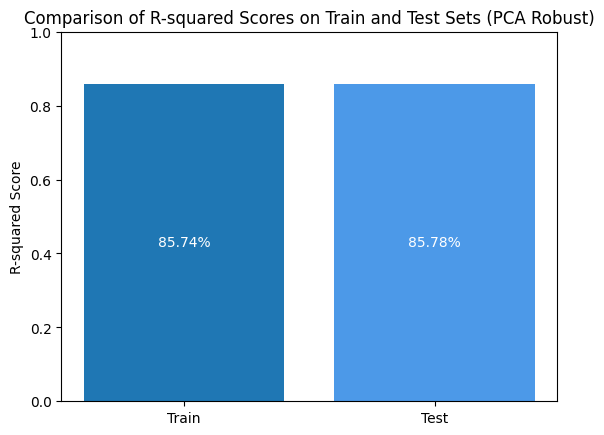

In [214]:
# Making predictions
y_train_pred = lr_model.predict(pca_rob_Train)
y_test_pred = lr_model.predict(pca_rob_Test)

# Calculating performance metrics for the training set
train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

# Calculating performance metrics for the test set
test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA Robust)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### linear regression on the main dataframe without any scaling but PCA applied


In [215]:
# Fit the Linear Regression model on PCA-cleaned training data
lr_model = LinearRegression()
lr_model.fit(pca_clean_Train, y_train_CL)

LinearRegression()

Train RMSE: 0.7527742024120134, Train R²: 0.5421628863278998
Test RMSE: 0.7524966154130663, Test R²: 0.5429107534655233


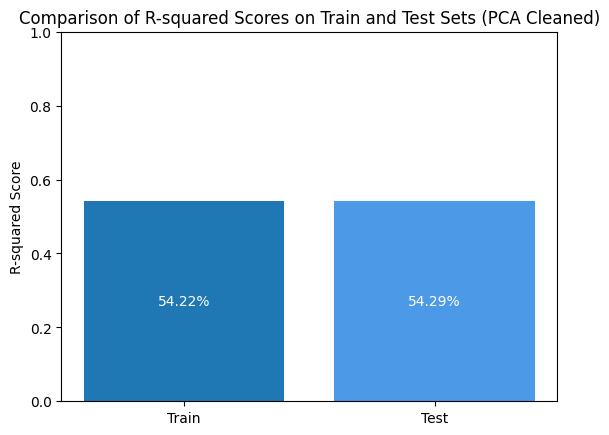

In [216]:
# Making predictions
y_train_pred = lr_model.predict(pca_clean_Train)
y_test_pred = lr_model.predict(pca_clean_Test)

# Calculating performance metrics for the training set
train_mse = mean_squared_error(y_train_CL, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_CL, y_train_pred)

# Calculating performance metrics for the test set
test_mse = mean_squared_error(y_test_CL, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_CL, y_test_pred)

# Printing the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA Cleaned)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### 3rd: XGBoost

In [219]:
# Use XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### xgboost on the cleaned_df dataset (Without any scaling or PCA)

Train RMSE: 0.15859278307093544, Train R^2: 0.97967884534687
Test RMSE: 0.1622379480164787, Test R^2: 0.9787530404104593


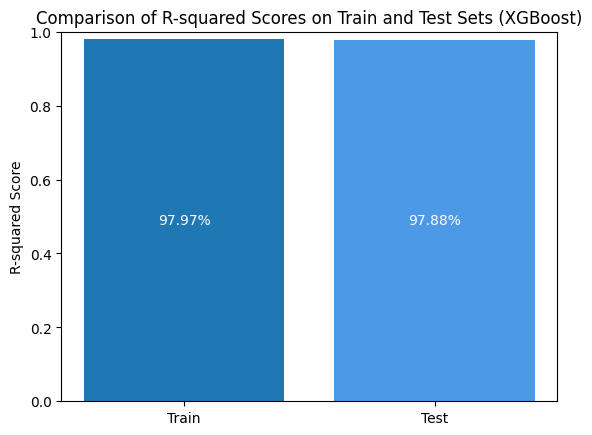

In [220]:
# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate performance metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate performance metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print performance metrics
print(f"Train RMSE: {train_rmse}, Train R^2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R^2: {test_r2}")

# Plotting R² scores for train and test sets
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Standard Scaler for C1

In [222]:
# XGBoost regression for C1
xgb_model = XGBRegressor()
xgb_model.fit(X_train_C1, y_train_C1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE: 0.15859278307093544, Train R2: 0.97967884534687
Test RMSE: 0.1622379480164787, Test R2: 0.9787530404104593


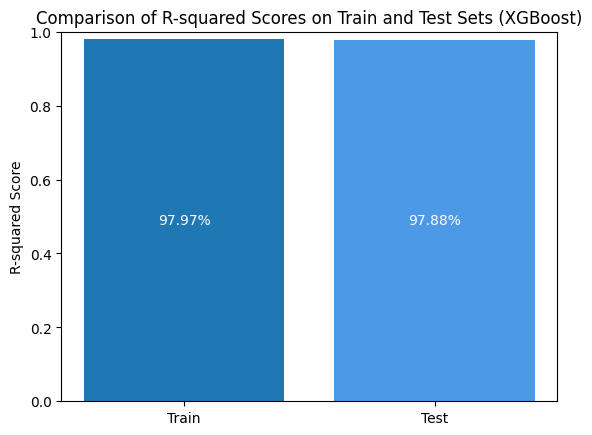

In [223]:
# Predictions
y_train_pred = xgb_model.predict(X_train_C1)
y_test_pred = xgb_model.predict(X_test_C1)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C1, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### MinMax Scaler for C2

In [225]:
# XGBoost regression for C2
xgb_model = XGBRegressor()
xgb_model.fit(X_train_C2, y_train_C2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE: 0.15859278307093544, Train R2: 0.97967884534687
Test RMSE: 0.1622379480164787, Test R2: 0.9787530404104593


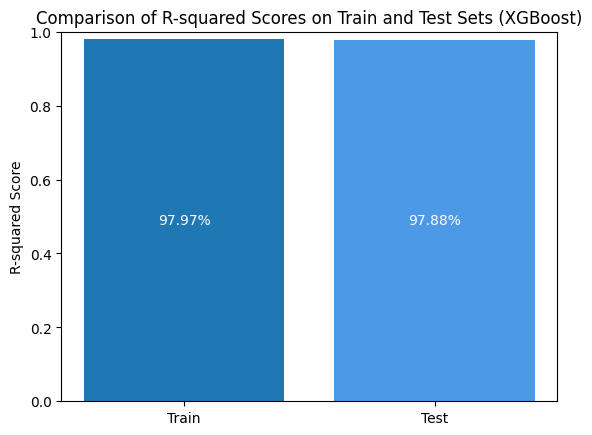

In [226]:
# Predictions
y_train_pred = model.predict(X_train_C2)
y_test_pred = model.predict(X_test_C2)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Robust Scaler for C3

In [227]:
# XGBoost regression for C3
xgb_model = XGBRegressor()
xgb_model.fit(X_train_C3, y_train_C3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE: 0.15859278307093544, Train R2: 0.97967884534687
Test RMSE: 0.1622379480164787, Test R2: 0.9787530404104593


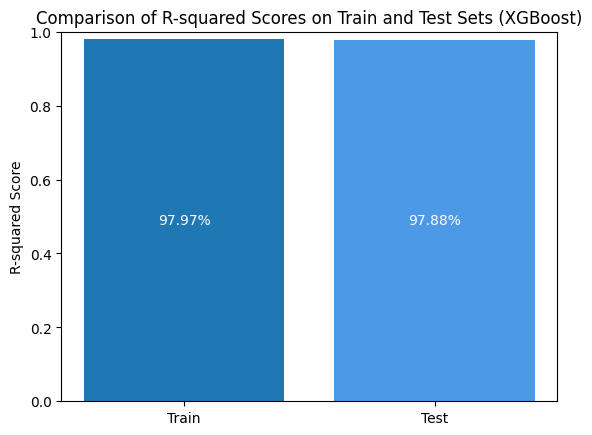

In [228]:
# Predictions
y_train_pred = xgb_model.predict(X_train_C3)
y_test_pred = xgb_model.predict(X_test_C3)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### PCA of copy1 (PCA on standared Scale Dataset)

In [229]:
# XGBoost regression
xgb_model = XGBRegressor()
xgb_model.fit(pca_std_Train, y_train_C1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE: 0.19530258276291815, Train R2: 0.969182492279893
Test RMSE: 0.2054614460196233, Test R2: 0.9659236882279361


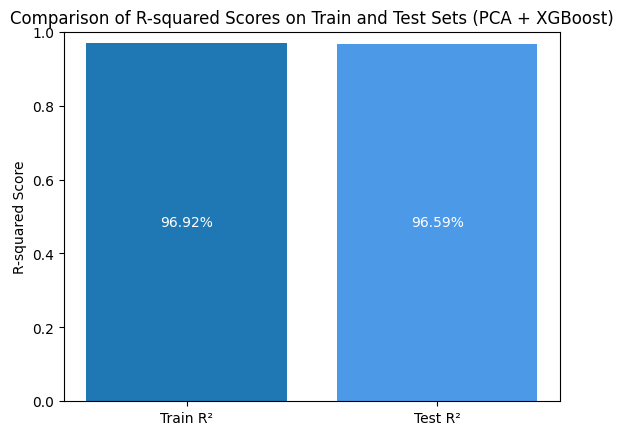

In [230]:
# Predictions
y_train_pred = xgb_model.predict(pca_std_Train)
y_test_pred = xgb_model.predict(pca_std_Test)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C1, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

# Labels and R² scores
labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA + XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### PCA of copy2 (PCA scaled in Min max scaler)

In [235]:
# XGBoost regression
xgb_model = XGBRegressor()
xgb_model.fit(pca_norm_Train, y_train_C2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE: 0.18987287033981232, Train R2: 0.9708722209415137
Test RMSE: 0.19747578677407157, Test R2: 0.9685210956460915


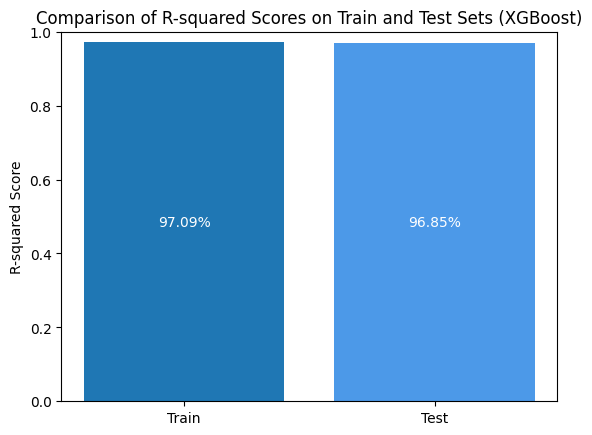

In [237]:
# Predictions
y_train_pred = xgb_model.predict(pca_norm_Train)
y_test_pred = xgb_model.predict(pca_norm_Test)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### PCA of copy3 (PCA scaled using Robust scaler)

In [238]:
# XGBoost regression
xgb_model = XGBRegressor()
xgb_model.fit(pca_rob_Train, y_train_C3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Train RMSE: 0.19730825185293038, Train R2: 0.968546278454982
Test RMSE: 0.20403292363629486, Test R2: 0.9663958892110095


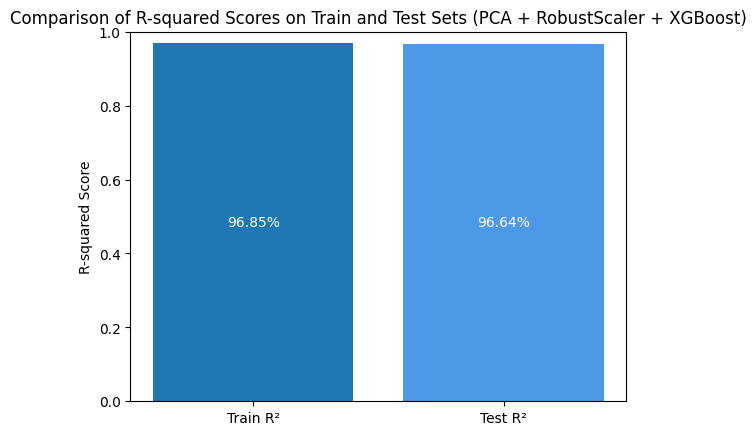

In [239]:
# Predictions
y_train_pred = xgb_model.predict(pca_rob_Train)
y_test_pred = xgb_model.predict(pca_rob_Test)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

# Labels and R² scores
labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA + RobustScaler + XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### main dataframe without any scaling but PCA applied

In [240]:
# XGBoost regression model
cl_model = xgb.XGBRegressor()

# Fit the model
cl_model.fit(pca_clean_Train, y_train_CL)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
y_train_pred = model.predict(pca_clean_Train)
y_test_pred = model.predict(pca_clean_Test)

# Calculating RMSE and R² for training set
train_mse = mean_squared_error(y_train_CL, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_CL, y_train_pred)

# Calculating RMSE and R² for test set
test_mse = mean_squared_error(y_test_CL, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_CL, y_test_pred)

# Print the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

# Labels and R² scores
labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()